# _Big Picture_

We are gonna create machine learning to predict customer satisfaction based on their transaction. We gonna create 2 machine learning or 1 machine learning with 2 threshold so we can have one machine learning/threshold wich have good precision score and one machine learning/threshold which have good recall score. The implementation for the machine learning is when the machine learning predict that those transaction is unsatisfied transaction we gonna say sorry to the customer by email or directly from the app and give them discount for the next purchase based on which machine learning/threshold that predict those transaction is unsatisfied transaction. By applying this, we hope that even the customer facing unsatisfied transaction they gonna doing next purchase because we already give them discount for the next purchase

# _Cutsomer Satisfaction_

There are 2 main source of customer satisfaction, those are online and offline features (Ahn et al., 2004 ; Eid, 2011). Online features are User Interface Quality, Information Quality and Service Quality. While offline features are Product Quality and Delivery Services. Offline features is important to determine customer satisfaction because buyers consider e-commerce not merely as an information system but also as a virtual store which provides the full stages of purchasing process of finding, ordering, and receiving (Ahn et al., 2011). We focus on offline features because its harder to maintain by e-commerce because Product Quality and Delivery Services are not their main responsibility.

# _Customer Retention_

Customer retention as occurring when the customer continues to purchase the product or service or when the customer indicates the intention to purchase the product or service at the next purchase (Blattberg et al., 2001). There are several things have significant impact on Customer Retention. Jayanta & Geetha (2014) said that customer satisfaction, payment equity, Effective Commitment & Trigger are determinant factors of customer retention. While, Perez et al. (2017) said that consumer trust in the site and user satisfaction with the shopping experience are determinant factors in repurchase intention.

In [1]:
import pandas as pd
import numpy as np 
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

<br>

# _Load All Data_

In [2]:
dfOrdersItems = pd.read_csv('./input/olist_order_items_dataset.csv')
dfOrders = pd.read_csv('./input/olist_orders_dataset.csv')
dfProducts = pd.read_csv('./input/olist_products_dataset.csv')
dfOrdersReviews = pd.read_csv('./input/olist_order_reviews_dataset.csv')
dfSellers = pd.read_csv('./input/olist_sellers_dataset.csv')
dfCustomers = pd.read_csv('./input/olist_customers_dataset.csv')
dfGeolocation = pd.read_csv('./input/geolocation_v2.csv')
dfTranslation = pd.read_csv('./input/product_category_name_translation.csv')
dfPayment = pd.read_csv('./input/olist_order_payments_dataset.csv')

<br>

# _Beautifying Some Dataset_

### _Product Dataset_

In [3]:
dfProducts = dfProducts.merge(dfTranslation, on='product_category_name')
dfProducts.drop('product_category_name', axis=1, inplace=True)
dfProducts.rename(columns={
    'product_category_name_english' : 'product_category'
}, inplace=True)
dfProducts.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery


### _Seller Dataset_

In [4]:
dfSellerx = pd.merge(dfSellers, dfGeolocation, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix')
dfSellerx.rename(columns={
    'geolocation_lat' : 'seller_lat',
    'geolocation_lng' : 'sellet_lng',
}, inplace=True)
dfSellerx = dfSellerx[['seller_id','seller_lat','sellet_lng','seller_city']]
dfSellerx.head()

,seller_id,seller_lat,sellet_lng,seller_city
0,3442f8959a84dea7ee197c632cb2df15,-22.898536,-47.063125,campinas
1,e0eabded302882513ced4ea3eb0c7059,-22.898536,-47.063125,campinas
2,d1b65fc7debc3361ea86b5f14c68d2e2,-22.382941,-46.946641,mogi guacu
3,ce3ad9de960102d0677a81f5d0bb7b2d,-22.910641,-43.176510,rio de janeiro
4,1d2732ef8321502ee8488e8bed1ab8cd,-22.910641,-43.176510,rio de janeiro


### _Customer Dataset_

In [5]:
dfCustomerx = pd.merge(dfCustomers, dfGeolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
dfCustomerx.rename(columns={
    'geolocation_lat' : 'customer_lat',
    'geolocation_lng' : 'customer_lng'
}, inplace=True)
dfCustomerx = dfCustomerx[['customer_id','customer_unique_id','customer_lat','customer_lng','customer_city']]
dfCustomerx.head()

,customer_id,customer_unique_id,customer_lat,customer_lng,customer_city
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,-20.509897,-47.397866,franca
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,-20.509897,-47.397866,franca
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,-20.509897,-47.397866,franca
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,-20.509897,-47.397866,franca
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,-20.509897,-47.397866,franca


<br>

# _Merging Dataset_

![](https://i.imgur.com/HRhd2Y0.png)

In [6]:
df = pd.merge(dfOrders, dfOrdersItems, on='order_id', how='right')
df = df.merge(dfProducts, on='product_id')
df = df.merge(dfOrdersReviews, on='order_id')
df = df.merge(dfSellerx, on='seller_id')
df = df.merge(dfCustomerx, on='customer_id')
df = df.merge(dfPayment, on='order_id')
df = df.rename(columns={'price':'product_price','order_item_id':'quantity'})
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,quantity,product_id,...,sellet_lng,seller_city,customer_unique_id,customer_lat,customer_lng,customer_city,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,-46.452454,maua,7c396fd4830fd04220f754e42b4e5bff,-23.574809,-46.587471,sao paulo,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,-46.452454,maua,7c396fd4830fd04220f754e42b4e5bff,-23.574809,-46.587471,sao paulo,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,-46.452454,maua,7c396fd4830fd04220f754e42b4e5bff,-23.574809,-46.587471,sao paulo,2,voucher,1,18.59
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,...,-46.452454,maua,3a51803cc0d012c3b5dc8b7528cb05f7,-23.565578,-46.534603,sao paulo,1,credit_card,3,37.77
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,...,-46.452454,maua,ef0996a1a279c26e7ecbd737be23d235,-23.543295,-46.630743,sao paulo,1,credit_card,1,37.77


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116007 entries, 0 to 116006
Data columns (total 39 columns):
order_id                         116007 non-null object
customer_id                      116007 non-null object
order_status                     116007 non-null object
order_purchase_timestamp         116007 non-null object
order_approved_at                115993 non-null object
order_delivered_carrier_date     114805 non-null object
order_delivered_customer_date    113509 non-null object
order_estimated_delivery_date    116007 non-null object
quantity                         116007 non-null int64
product_id                       116007 non-null object
seller_id                        116007 non-null object
shipping_limit_date              116007 non-null object
product_price                    116007 non-null float64
freight_value                    116007 non-null float64
product_name_lenght              116007 non-null float64
product_description_lenght       116007 non-nul

In [8]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                   round((df[col].isna().sum()/len(df[col])) *100 , 2),
                   df[col].nunique(), list(df[col].unique()[:2])])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'null(%)', 'unique', 'uniquesample'], data=listItem)
dfDesc

,dataFeatures,dataType,null,null(%),unique,uniquesample
0,order_id,object,0,0.00,96773,"[e481f51cbdc54678b7cc49136f2d6af7, 128e10d9571..."
1,customer_id,object,0,0.00,96773,"[9ef432eb6251297304e76186b10a928d, a20e8105f23..."
2,order_status,object,0,0.00,7,"[delivered, shipped]"
3,order_purchase_timestamp,object,0,0.00,96244,"[2017-10-02 10:56:33, 2017-08-15 18:29:31]"
4,order_approved_at,object,14,0.01,88546,"[2017-10-02 11:07:15, 2017-08-15 20:05:16]"
5,order_delivered_carrier_date,object,1202,1.04,79427,"[2017-10-04 19:55:00, 2017-08-17 15:28:33]"
6,order_delivered_customer_date,object,2498,2.15,93872,"[2017-10-10 21:25:13, 2017-08-18 14:44:43]"
7,order_estimated_delivery_date,object,0,0.00,449,"[2017-10-18 00:00:00, 2017-08-28 00:00:00]"
8,quantity,int64,0,0.00,21,"[1, 2]"
9,product_id,object,0,0.00,32220,"[87285b34884572647811a353c7ac498a, b00a32a0b42..."


Note :
* we have 116.007 transaction data, but there are only 96.773 unique order_id. so there must be some order which included 2 or more product
* the number of customer_id is same as order_id because customer_id is not representing each unique customer. each unique customer represent by customer_unique_id
* review_comment_title is the columns which have the most null value followed by review_comment_message, order_delivered_customer_date, etc
* we can create additional features such as approving, processing and delivery time from the timestamp feature
* we also can create distance from customer and seller lattitude and longitude

<br>

# _Filtering_

### _Delivered Product Only_

In [9]:
df = df[df['order_status'] == 'delivered']

# _Data Analysis_

### _Transaction Detail_

Creating number of purchase by customer

In [10]:
df = df.reset_index()

In [11]:
data = np.zeros(df.shape[0])
for item in df['customer_unique_id'].unique():
    for i, item2 in enumerate (df[df['customer_unique_id'] == item]['order_id'].unique()):
        data[df[df['order_id'] == item2].index] += (i+1)

df['purchase'] = data

let's check does our code work correctly

In [12]:
df['purchase'] = df['purchase'].astype('int')

In [13]:
df['purchase'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

In [14]:
df[df['customer_unique_id'] == '7c396fd4830fd04220f754e42b4e5bff'][['order_id','customer_unique_id','purchase']]

,order_id,customer_unique_id,purchase
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,1
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,1
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,1
86862,69923a4e07ce446644394df37a710286,7c396fd4830fd04220f754e42b4e5bff,2


select date only from "order_purchase_timestamp" and convert it into timestamp format

In [57]:
df['order_purchase_timestamp'] = df['order_purchase_timestamp'].apply(
    lambda row : row[:10]
)
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

creating columns repurchase, 1 if the transaction is repurchase and 0 otherwise

In [58]:
df['repurchase'] = df['purchase'].apply(
    lambda row : 0 if row == 1 else 1
)

creating columns sales revenue based on product price and quantity

In [59]:
data1 = df[['order_purchase_timestamp','quantity','product_price','repurchase']]
data1['sales_revenue'] = data1['product_price'] * data1['quantity']
data1 = data1.set_index('order_purchase_timestamp')
data1 = data1.sort_index()
data1.head()

c:\users\m. khakim hidayad\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,quantity,product_price,repurchase,sales_revenue
order_purchase_timestamp,,,,
2016-10-03,1,119.90,0,119.90
2016-10-03,1,21.90,0,21.90
2016-10-03,1,29.90,1,29.90
2016-10-03,1,36.49,0,36.49
2016-10-03,1,29.99,0,29.99


grouping data based on index, and creating product_sold columns

In [60]:
data2 = data1['quantity'].groupby(data1.index).describe()
data2['product_sold'] = data2['count'] * data2['mean']
data2.head()

,count,mean,std,min,25%,50%,75%,max,product_sold
order_purchase_timestamp,,,,,,,,,
2016-10-03,7.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0,7.0
2016-10-04,69.0,1.173913,0.513252,1.0,1.0,1.0,1.0,4.0,81.0
2016-10-05,51.0,1.627451,1.264291,1.0,1.0,1.0,1.5,6.0,83.0
2016-10-06,47.0,1.127660,0.337318,1.0,1.0,1.0,1.0,2.0,53.0
2016-10-07,45.0,1.177778,0.490310,1.0,1.0,1.0,1.0,3.0,53.0


c:\users\m. khakim hidayad\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


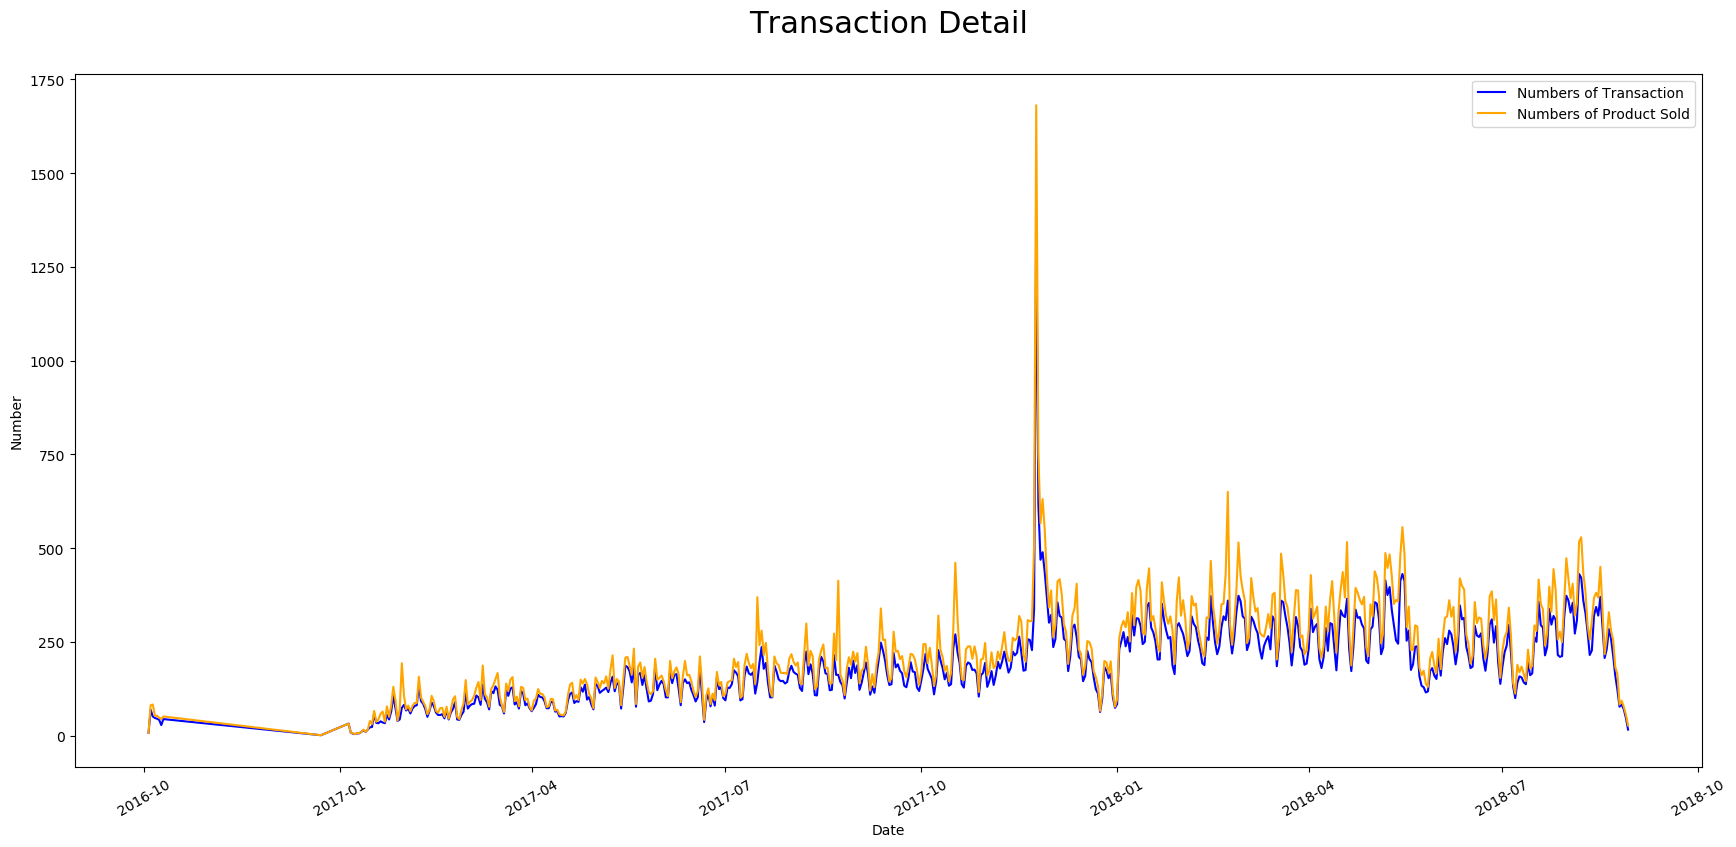

In [74]:
plt.style.use('default')
fig = plt.figure(figsize = (21,9))
plt.plot(data2.index, data2['count'], 'blue')
plt.plot(data2.index, data2['product_sold'], 'orange')
plt.legend(['Numbers of Transaction','Numbers of Product Sold'])
plt.xticks(rotation=30)
plt.title('Transaction Detail', fontdict={'fontsize':'22'}, pad=30)
plt.xlabel('Date')
plt.ylabel('Number')
plt.show()

* In general, the number of transaction and product sold increased year over year
* there was a day where the number of either product transaction and product sold are the highest of all time

<br>

In [75]:
data2[data2['count'] > 850]

,count,mean,std,min,25%,50%,75%,max,product_sold
order_purchase_timestamp,,,,,,,,,
2017-11-24,1385.0,1.213718,0.602703,1.0,1.0,1.0,1.0,6.0,1681.0


that's normal since 24 November 2017 is black friday in Brazil

<br>

creating columns "first_purchase", "repurchase", revenue from first purchase transaction a.k.a "revenue_0" and revenue from repurchase transaction a.k.a "revenue_1"

In [61]:
data3 = data1[['quantity','repurchase']].groupby([data1.index,'repurchase'])
data3 = data3[['quantity']].describe()
data3 = data3.unstack()
data3['first_purchase'] = data3['quantity']['count'][0] * data3['quantity']['mean'][0]
data3['repurchase'] = data3['quantity']['count'][1] * data3['quantity']['mean'][1]
data3.head()

quantity                                          \
                            count           mean            std       min   
repurchase                      0    1         0    1         0    1    0   
order_purchase_timestamp                                                    
2016-10-03                    6.0  1.0  1.000000  1.0  0.000000  NaN  1.0   
2016-10-04                   68.0  1.0  1.176471  1.0  0.516624  NaN  1.0   
2016-10-05                   48.0  3.0  1.666667  1.0  1.293738  0.0  1.0   
2016-10-06                   46.0  1.0  1.130435  1.0  0.340503  NaN  1.0   
2016-10-07                   44.0  1.0  1.181818  1.0  0.495220  NaN  1.0   

                                                                       \
                               25%       50%       75%       max        
repurchase                  1    0    1    0    1    0    1    0    1   
order_purchase_timestamp                                                
2016-10-03                1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
2016-10-04                1.0  1.0  1.0  1.0  1.0  1.0  1.0  4.0  1.0   
2016-10-05                1.0  1.0  1.0  1.0  1.0  2.0  1.0  6.0  1.0   
2016-10-06                1.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  1.0   
2016-10-07                1.0  1.0  1.0  1.0  1.0  1.0  1.0  3.0  1.0   

                         first_purchase repurchase  
                                                    
repurchase                                          
order_purchase_timestamp                            
2016-10-03                          6.0        1.0  
2016-10-04                         80.0        1.0  
2016-10-05                         80.0        3.0  
2016-10-06                         52.0        1.0  
2016-10-07                         52.0        1.0

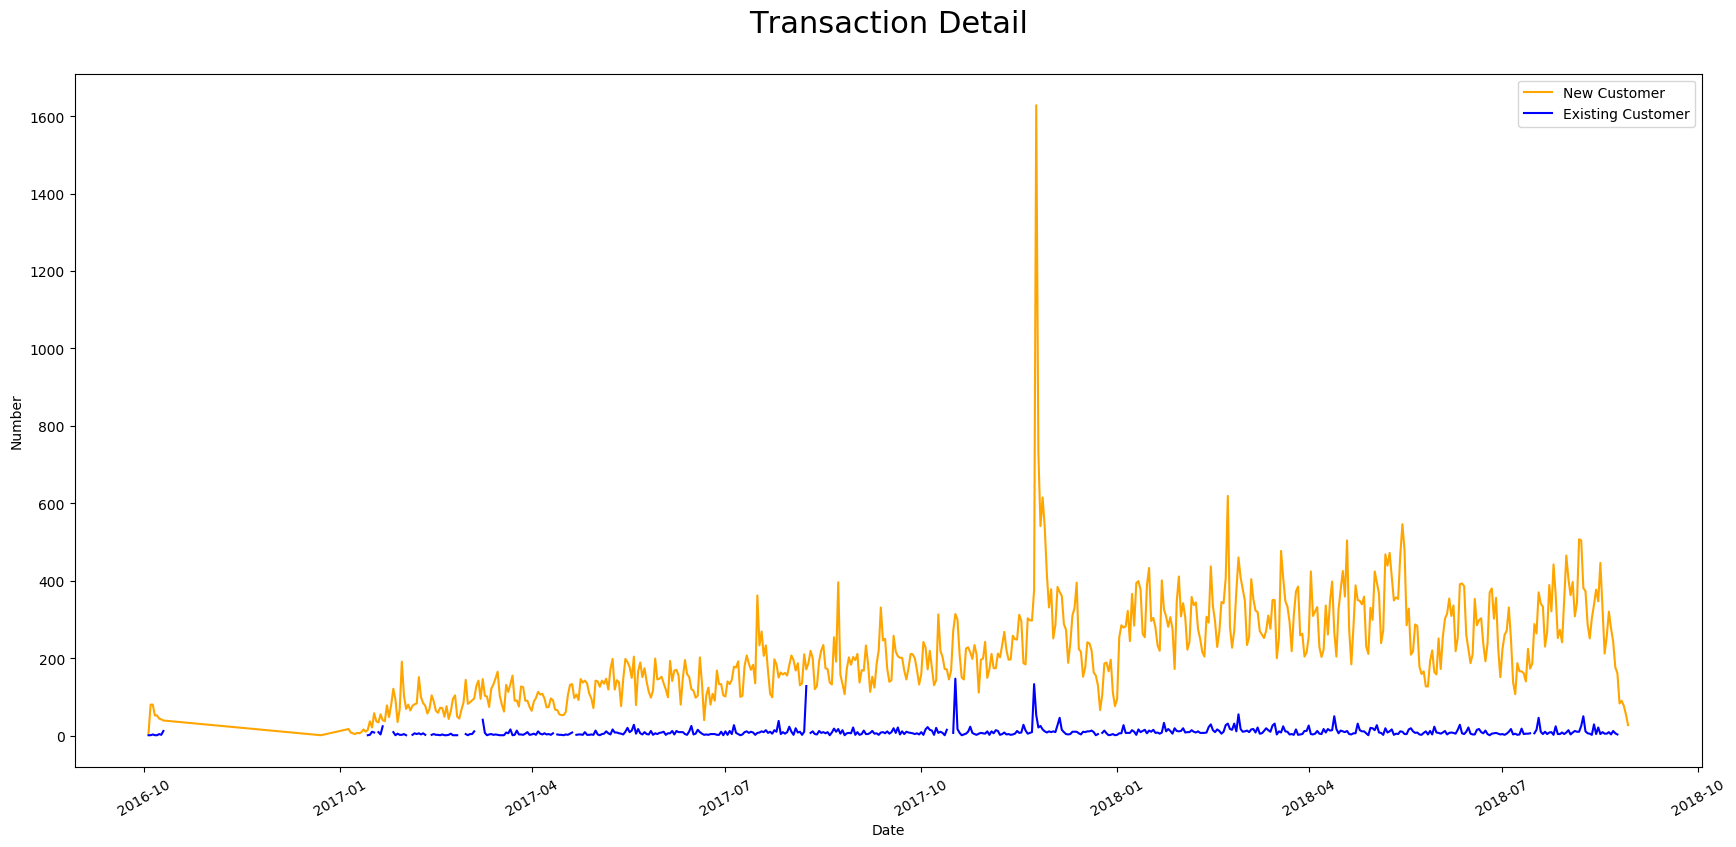

In [77]:
plt.style.use('default')
fig = plt.figure(figsize = (21,9))
plt.plot(list(data3.index), list(data3['first_purchase']), 'orange')
plt.plot(list(data3.index), list(data3['repurchase']), 'blue')
plt.legend(['New Customer','Existing Customer'])
plt.xticks(rotation=30)
plt.title('Transaction Detail', fontdict={'fontsize':'22'}, pad=30)
plt.xlabel('Date')
plt.ylabel('Number')
plt.show()

* we can see that the number of transaction made by existing customer was very low

<br>

In [78]:
df['repurchase'].value_counts()

0    109322
1      4164
Name: repurchase, dtype: int64

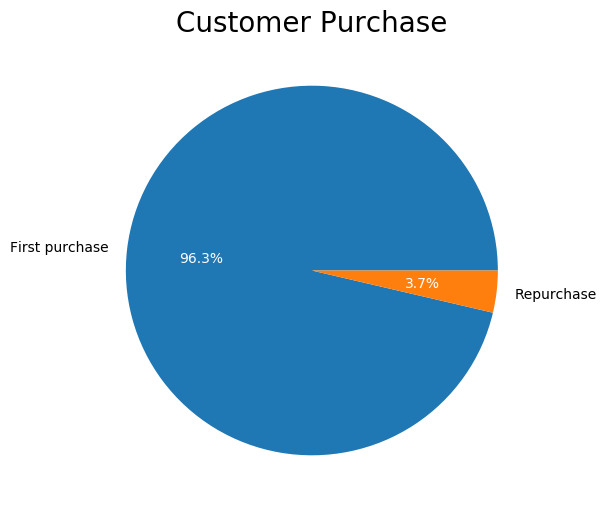

In [79]:
plt.style.use('default')
fig = plt.figure(figsize = (6,6))
wedges, texts, autotexts = plt.pie(df['repurchase'].value_counts(), labels=['First purchase', 'Repurchase'], autopct='%1.1f%%')
plt.title('Customer Purchase', fontdict={'fontsize':'20'})
for autotext in autotexts:
    autotext.set_color('white')
plt.show()

Note :
* the number of repurchase transactions was only 3.7% of the total transaction.
* it might be indicated that the customer was not satisfied enough with their transaction, so they are not making the next purchase or the company are doing really well in acquiring a new customer
* This condition might be costly for the company since they always have to seek new customer to increase their sales revenue while acquiring a new customer is more costly than keeping them
* let's see how bad it is from the customer retention view

<br>

# _Cutsomer Retention_

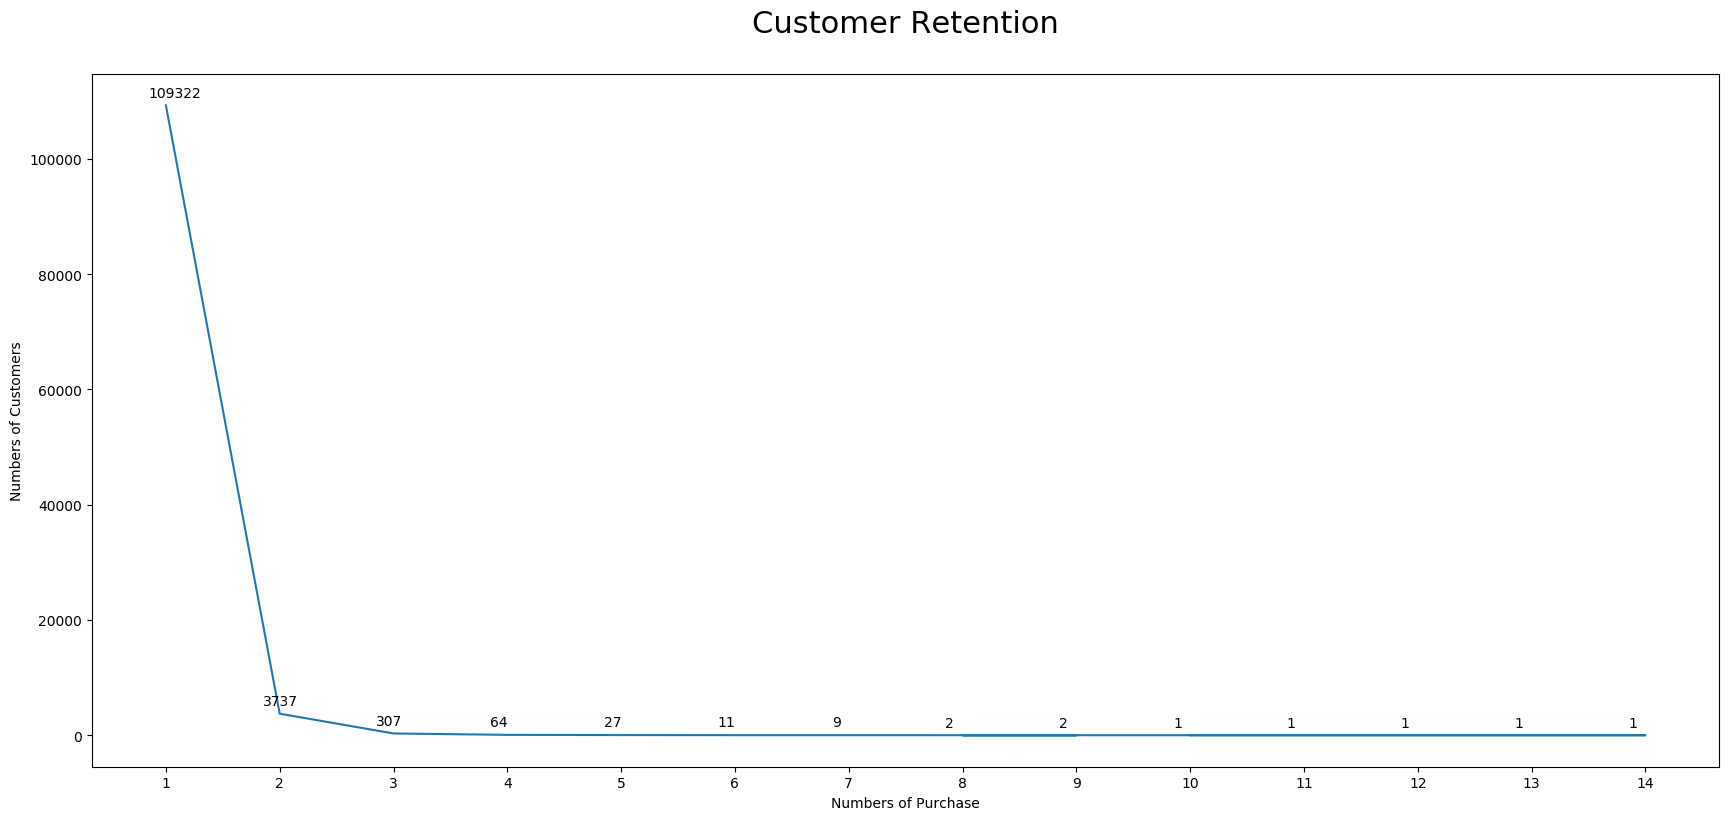

In [80]:
plt.style.use('default')
fig = plt.figure(figsize = (21,9))
plt.plot(df['purchase'].value_counts().index,df['purchase'].value_counts())
plt.xlabel('Numbers of Purchase')
plt.ylabel('Numbers of Customers')
plt.title('Customer Retention', fontdict={'fontsize':'22'}, pad=30)
plt.xticks(np.arange(df['purchase'].nunique())+1, np.arange(df['purchase'].nunique())+1)
xlocs = np.arange(df['purchase'].nunique())+1
for x, y in zip (xlocs,df['purchase'].value_counts()):
    plt.text(x - 0.15, y + 1500, str(y))
plt.show()

* This condition is so bad since the number of customer who make their second purchase droping 96.5% from the first

<br>

# _Sales Revenue_

### _Creating quarterly sales revenue_

In [62]:
data4 = data1[['sales_revenue','repurchase']].groupby([data1.index,'repurchase'])
data4 = data4[['sales_revenue']].describe()
data4 = data4.unstack()
data4['new_customer'] = data4['sales_revenue']['count'][0] * data4['sales_revenue']['mean'][0]
data4['existing_customer'] = data4['sales_revenue']['count'][1] * data4['sales_revenue']['mean'][1]
data4.head()

sales_revenue                               \
                                 count             mean               
repurchase                           0    1           0           1   
order_purchase_timestamp                                              
2016-10-03                         6.0  1.0   68.680000   29.900000   
2016-10-04                        68.0  1.0  142.957353  249.900000   
2016-10-05                        48.0  3.0  176.280208   58.233333   
2016-10-06                        46.0  1.0  143.705652   41.990000   
2016-10-07                        44.0  1.0  164.514773   30.970000   

                                                                              \
                                 std             min             25%           
repurchase                         0         1     0       1       0       1   
order_purchase_timestamp                                                       
2016-10-03                 46.925698       NaN  21.9   29.90  31.615   29.90   
2016-10-04                165.438300       NaN   9.9  249.90  59.900  249.90   
2016-10-05                180.164342  2.886751  10.0   54.90  44.730   57.40   
2016-10-06                158.935817       NaN  18.9   41.99  49.200   41.99   
2016-10-07                138.192050       NaN  18.9   30.97  56.375   30.97   

                                                                             \
                              50%               75%             max           
repurchase                      0       1         0       1       0       1   
order_purchase_timestamp                                                      
2016-10-03                 55.695   29.90  108.6500   29.90  128.90   29.90   
2016-10-04                 89.900  249.90  149.9225  249.90  949.99  249.90   
2016-10-05                 95.900   59.90  249.9000   59.90  649.00   59.90   
2016-10-06                 83.995   41.99  139.2175   41.99  649.17   41.99   
2016-10-07                129.435   30.97  227.1000   30.97  590.00   30.97   

                         new_customer existing_customer  
                                                         
repurchase                                               
order_purchase_timestamp                                 
2016-10-03                     412.08             29.90  
2016-10-04                    9721.10            249.90  
2016-10-05                    8461.45            174.70  
2016-10-06                    6610.46             41.99  
2016-10-07                    7238.65             30.97

In [67]:
SixTeenQ4 = data4['2016-10' : '2016-12']
SevenTeenQ1 = data4['2017-01' : '2017-03']
SevenTeenQ2 = data4['2017-04' : '2017-06']
SevenTeenQ3 = data4['2017-07' : '2017-07']
SevenTeenQ4 = data4['2017-10' : '2017-12']
EightTeenQ1 = data4['2018-01' : '2018-03']
EightTeenQ2 = data4['2018-04' : '2018-06']

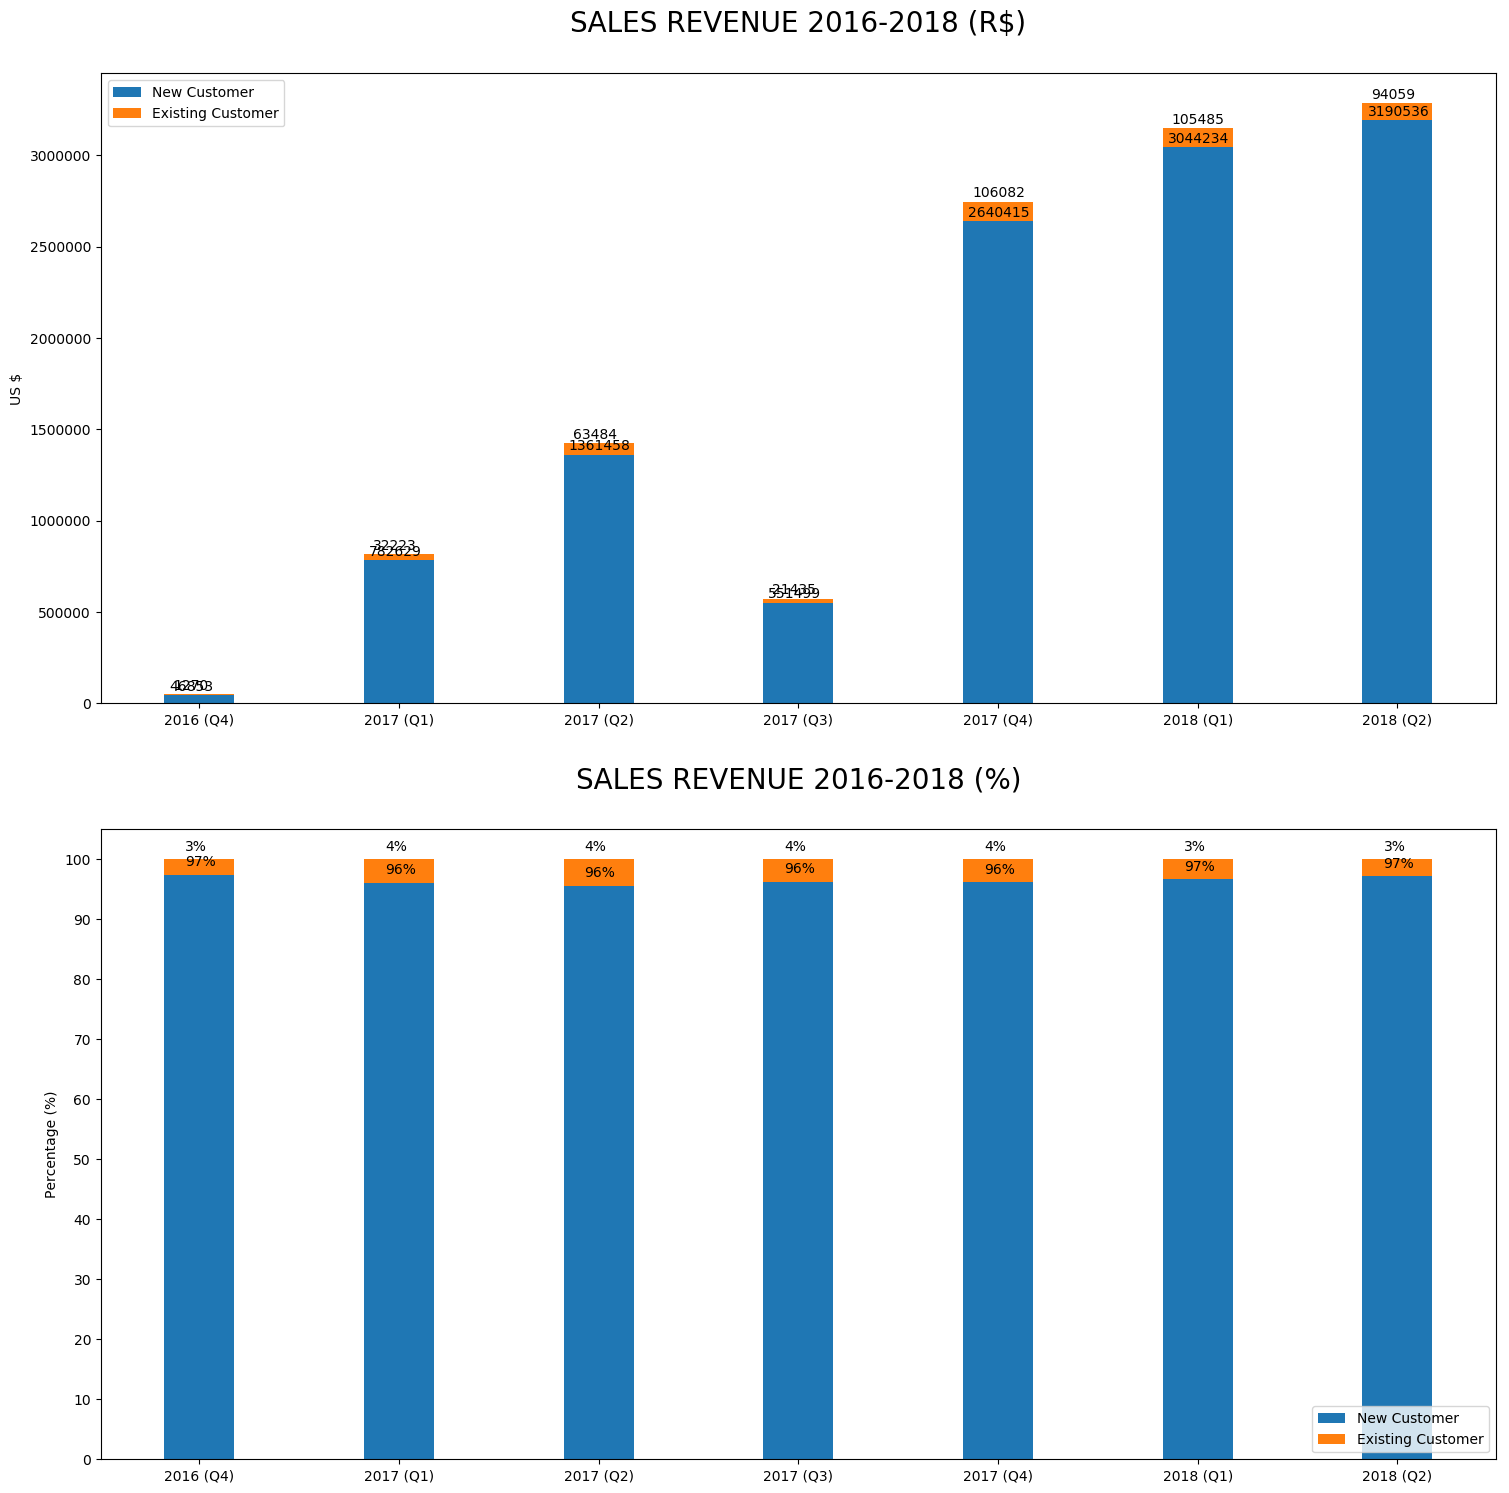

In [70]:
plt.style.use('default')
fig = plt.figure(figsize = (18,18))


plt.subplot(2,1,1)
N = 7
first_purchase = (SixTeenQ4['new_customer'].sum() , SevenTeenQ1['new_customer'].sum(), SevenTeenQ2['new_customer'].sum() , SevenTeenQ3['new_customer'].sum() , SevenTeenQ4['new_customer'].sum() , EightTeenQ1['new_customer'].sum() , EightTeenQ2['new_customer'].sum())
repurchase = (SixTeenQ4['existing_customer'].sum() , SevenTeenQ1['existing_customer'].sum() , SevenTeenQ2['existing_customer'].sum() , SevenTeenQ3['existing_customer'].sum() , SevenTeenQ4['existing_customer'].sum() , EightTeenQ1['existing_customer'].sum() , EightTeenQ2['existing_customer'].sum())
ind = np.arange(N)
width = 0.35

p1 = plt.bar(ind, first_purchase, width)
p2 = plt.bar(ind, repurchase, width,
             bottom=first_purchase)

plt.ylabel('US $')
plt.title('SALES REVENUE 2016-2018 (R$)', fontdict={'fontsize':'20'}, pad=30)
plt.xticks(ind, (['2016 (Q4)', '2017 (Q1)' , '2017 (Q2)' , '2017 (Q3)' , '2017 (Q4)' , '2018 (Q1)' , '2018 (Q2)']))
xlocs = plt.xticks()
for x, y in zip (xlocs[0],list(first_purchase)):
    plt.text(x - 0.15, y + 25000, str(int(round(y))))
for x, y, z in zip (xlocs[0],list(repurchase),(np.array(repurchase) + np.array(first_purchase))):
    plt.text(x - 0.13, z + 25000, str(int(round(y))))
plt.legend((p1[0], p2[0]), ('New Customer', 'Existing Customer'))


plt.subplot(2,1,2)
N = 7
first_purchase = (SixTeenQ4['new_customer'].sum()/(SixTeenQ4['new_customer'].sum()+SixTeenQ4['existing_customer'].sum())*100 , SevenTeenQ1['new_customer'].sum()/(SevenTeenQ1['new_customer'].sum()+SevenTeenQ1['existing_customer'].sum())*100 , SevenTeenQ2['new_customer'].sum()/(SevenTeenQ2['new_customer'].sum()+SevenTeenQ2['existing_customer'].sum())*100 , SevenTeenQ3['new_customer'].sum()/(SevenTeenQ3['new_customer'].sum()+SevenTeenQ3['existing_customer'].sum())*100 , SevenTeenQ4['new_customer'].sum()/(SevenTeenQ4['new_customer'].sum()+SevenTeenQ4['existing_customer'].sum())*100 , EightTeenQ1['new_customer'].sum()/(EightTeenQ1['new_customer'].sum()+EightTeenQ1['existing_customer'].sum())*100 , EightTeenQ2['new_customer'].sum()/(EightTeenQ2['new_customer'].sum()+EightTeenQ2['existing_customer'].sum())*100)
repurchase = (SixTeenQ4['existing_customer'].sum()/(SixTeenQ4['new_customer'].sum()+SixTeenQ4['existing_customer'].sum())*100 , SevenTeenQ1['existing_customer'].sum()/(SevenTeenQ1['new_customer'].sum()+SevenTeenQ1['existing_customer'].sum())*100 , SevenTeenQ2['existing_customer'].sum()/(SevenTeenQ2['new_customer'].sum()+SevenTeenQ2['existing_customer'].sum())*100 , SevenTeenQ3['existing_customer'].sum()/(SevenTeenQ3['new_customer'].sum()+SevenTeenQ3['existing_customer'].sum())*100 , SevenTeenQ4['existing_customer'].sum()/(SevenTeenQ4['new_customer'].sum()+SevenTeenQ4['existing_customer'].sum())*100 , EightTeenQ1['existing_customer'].sum()/(EightTeenQ1['new_customer'].sum()+EightTeenQ1['existing_customer'].sum())*100 , EightTeenQ2['existing_customer'].sum()/(EightTeenQ2['new_customer'].sum()+EightTeenQ2['existing_customer'].sum())*100)
ind = np.arange(N)
width = 0.35

p1 = plt.bar(ind, first_purchase, width)
p2 = plt.bar(ind, repurchase, width,
             bottom=first_purchase)

plt.ylabel('Percentage (%)')
plt.title('SALES REVENUE 2016-2018 (%)', fontdict={'fontsize':'20'}, pad=30)
plt.xticks(ind, (['2016 (Q4)', '2017 (Q1)' , '2017 (Q2)' , '2017 (Q3)' , '2017 (Q4)' , '2018 (Q1)' , '2018 (Q2)']))
xlocs = plt.xticks()
for x, y in zip (xlocs[0],list(first_purchase)):
    plt.text(x - 0.07, y + 1.5, str(int(round(y))) + '%')
for x, y, z in zip (xlocs[0],list(repurchase),(np.array(repurchase) + np.array(first_purchase))):
    plt.text(x - 0.07, z + 1.5, str(int(round(y))) + '%')
plt.yticks(np.arange(0, 101, 10))
plt.legend((p1[0], p2[0]), ('New Customer', 'Existing Customer'), loc='lower right')

Note:
* Sales performance in Q3 2017 was poor because of the sales revenue drop significantly from the previous quarter.
* The sales revenue made by existing customer is always lower than the sales revenue made by first purchase transactions.
* Although the number of sales revenue is different from each quarter, the percentage of sales revenue made by existing customer always around 3%-4%

<br>

# _Customer Satisfaction_

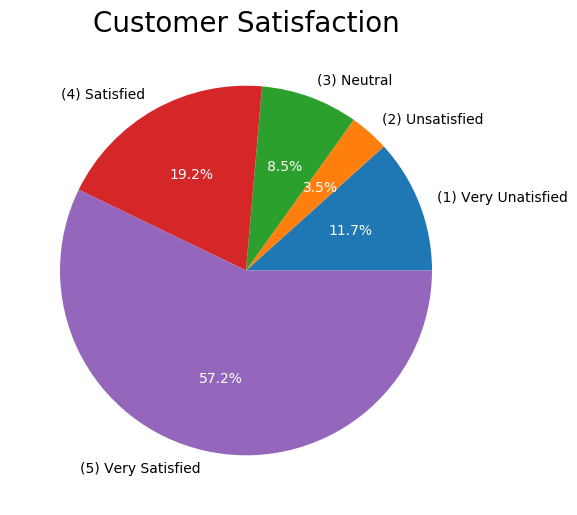

In [83]:
plt.style.use('default')
fig = plt.figure(figsize = (6,6))
wedges, texts, autotexts = plt.pie(df['review_score'].value_counts().sort_index(), labels=['(1) Very Unatisfied', '(2) Unsatisfied', '(3) Neutral' , '(4) Satisfied' , '(5) Very Satisfied'], autopct='%1.1f%%')
plt.title('Customer Satisfaction', fontdict={'fontsize':'20'})
for autotext in autotexts:
    autotext.set_color('white')

Note:
* Most of our customer are Very Satisfied (5) with their transaction
* Let's take a look the impact of customer satisfaction on their intention to repurchase

### _Review Score Before_

In [46]:
df = df.reset_index()

In [47]:
data = np.zeros(df.shape[0])
for item in df['customer_unique_id'].unique():
    if df[df['customer_unique_id'] == item].shape[0] > 1:
        for item1, item2 in zip ( df[df['customer_unique_id'] == item]['order_id'].unique() ,df[df['customer_unique_id'] == item]['order_id'].unique()[1:]):
            data[df[df['order_id'] == item2].index] += df[(df['customer_unique_id'] == item) & (df['order_id'] == item1)]['review_score'].unique()[0]

df['review_score_before'] = data

let's check does our code work correctly

In [48]:
df['review_score_before'] = df['review_score_before'].astype('int')

In [49]:
df[df['customer_unique_id'] == '6469f99c1f9dfae7733b25662e7f1782'][['order_id','customer_unique_id','purchase','review_score_before','review_score']]

,order_id,customer_unique_id,purchase,review_score_before,review_score
6391,72a704e8fb6c499fad9b26bd8873bd39,6469f99c1f9dfae7733b25662e7f1782,1,0,5
6392,ccb1046449f1a494de800567e7cb5979,6469f99c1f9dfae7733b25662e7f1782,2,5,5
6393,48a51dd8d092c2c777f8dc6446f5684b,6469f99c1f9dfae7733b25662e7f1782,3,5,5
6394,48a51dd8d092c2c777f8dc6446f5684b,6469f99c1f9dfae7733b25662e7f1782,3,5,5
6420,1700e1cfac9c6837da3ccdb6c36c77de,6469f99c1f9dfae7733b25662e7f1782,4,5,5
6421,1700e1cfac9c6837da3ccdb6c36c77de,6469f99c1f9dfae7733b25662e7f1782,4,5,5
36719,c12f5561ebbafe496b47371c0271e839,6469f99c1f9dfae7733b25662e7f1782,5,5,5
58092,4266cc59dbee85121deb59ebfcf36eae,6469f99c1f9dfae7733b25662e7f1782,6,5,5
66964,bcf2e0138ecf66a8688ab369b802d57a,6469f99c1f9dfae7733b25662e7f1782,7,5,5


In [5]:
N0 = df[df['repurchase'] == 0]['review_score'].value_counts().sort_index()
N0

1    12865
2     3791
3     9273
4    21012
5    62381
Name: review_score, dtype: int64

In [4]:
N1 = df[df['repurchase'] == 1]['review_score_before'].value_counts().sort_index()
N1

1     429
2     149
3     363
4     642
5    2581
Name: review_score_before, dtype: int64

In [8]:
percentagex = [(item1/item2)*100 for item1, item2 in zip (N1, N0)]
percentagex

[3.334628837932375,
 3.9303613822210495,
 3.9145907473309607,
 3.0553969160479726,
 4.137477757650567]

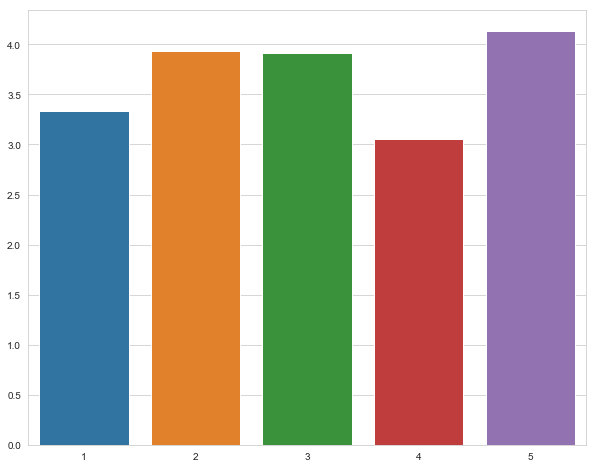

In [15]:
sns.set_style('whitegrid')
fig = plt.figure(figsize = (10,8))
sns.barplot(x=np.arange(5)+1, y=percentagex)

Note :
* customer who gives 5 review score from the previous transaction is having more intention to repurchase than the customer who give 1 review score although it not really different. it might be caused by there are unsatisfied customers but they give 5 review score because that happens a lot in reality. but remember there are no customers who feel satisfied but give 1 review score. so, we can say that all of the customers who give 1 review score are unsatisfied customers.
* like what I said before, customer satisfaction is not the only one that affecting customer retention. but customer satisfaction is one of the things that have a significant effect on customer retention. so, this model will help to solve customer retention problem

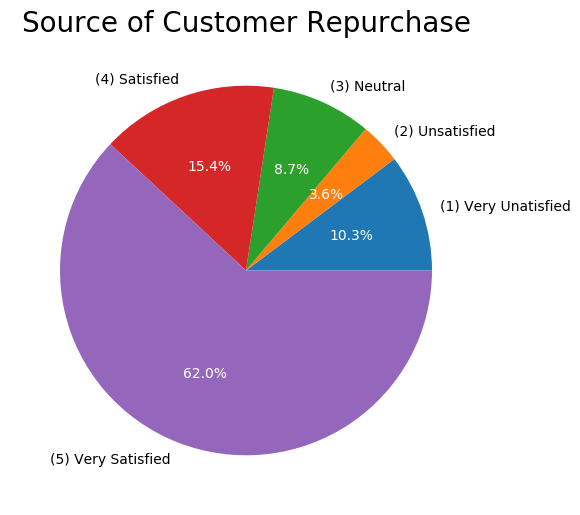

In [67]:
plt.style.use('default')
fig = plt.figure(figsize = (6,6))
wedges, texts, autotexts = plt.pie([N1.iloc[0],N1.iloc[1],N1.iloc[2],N1.iloc[3],N1.iloc[4]], labels=['(1) Very Unatisfied', '(2) Unsatisfied', '(3) Neutral' , '(4) Satisfied' , '(5) Very Satisfied'], autopct='%1.1f%%')
plt.title('Source of Customer Repurchase', fontdict={'fontsize':'20'})
for autotext in autotexts:
    autotext.set_color('white')
plt.show()

<br>

# _Creating Another Features_

### _Distance_

In [39]:
from math import sin, cos, sqrt, atan2, radians
df['distance'] = df[['seller_lat','sellet_lng','customer_lat','customer_lng']].apply(
    lambda row : round(6373.0 * (2 * atan2(sqrt((sin((radians(row['customer_lat']) - radians(row['seller_lat']))/2))**2 + cos(radians(row['seller_lat'])) * cos(radians(row['customer_lat'])) * (sin((radians(row['customer_lng']) - radians(row['sellet_lng']))/2))**2), sqrt(1-((sin((radians(row['customer_lat']) - radians(row['seller_lat']))/2))**2 + cos(radians(row['seller_lat'])) * cos(radians(row['customer_lat'])) * (sin((radians(row['customer_lng']) - radians(row['sellet_lng']))/2))**2)))))
    , axis=1
)

### _Freight Rate_

In [40]:
df['freight_rate'] = df[['freight_value','quantity']].apply(
    lambda row : round(row['freight_value'] / row['quantity'],2), axis=1
)

### _Approving time, Processing time, Delivery time, Seller on time and Delivery on time_
* approving time = the different between **order_purchase_timestamp** and **order_approved_at** | (seller responsibility)
* processing time = the different between **order_approved_at** and **order_delivered_carrier_date** | (seller responsibility)
* delivery time = the different between **order_delivered_carrier_date** and **order_delivered_customer_date**  | (carrier responsibility)

In [41]:
for item in ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','shipping_limit_date']:
    df[item] = pd.to_datetime(df[item])

In [42]:
df['approving_time'] = df[['order_purchase_timestamp','order_approved_at']].apply(
    lambda row : str(row['order_approved_at'] - row['order_purchase_timestamp']).split(' ')[0], axis=1
)
df['processing_time'] = df[['order_approved_at','order_delivered_carrier_date']].apply(
    lambda row : str(row['order_delivered_carrier_date'] - row['order_approved_at']).split(' ')[0], axis=1
)
df['delivery_time'] = df[['order_delivered_carrier_date','order_delivered_customer_date']].apply(
    lambda row : str(row['order_delivered_customer_date'] - row['order_delivered_carrier_date']).split(' ')[0], axis=1
)
df['courier_on_time'] = df[['order_delivered_customer_date','order_estimated_delivery_date']].apply(
    lambda row : 1 if row['order_delivered_customer_date'] <= row['order_estimated_delivery_date'] else 0, axis=1
)
df['seller_on_time'] = df[['order_delivered_carrier_date','shipping_limit_date']].apply(
    lambda row : 1 if row['order_delivered_carrier_date'] <= row['shipping_limit_date'] else 0, axis=1
)

### _Clearing NaT Value_

In [43]:
df = df[df.approving_time != 'NaT']
df = df[df.processing_time != 'NaT']
df = df[df.delivery_time != 'NaT']

### _Seller rating, Product Rating, Number of Product Sold by Seller and Quantity Product Sold_

In [44]:
seller_ratingx = {}
product_soldx = {} 
product_ratingx = {}
quantity_soldx = {}

for item in df['seller_id'].unique():
    seller_ratingx[item] = round(df[df['seller_id'] == item]['review_score'].mean(),1)
    product_soldx[item] = int(df[df['seller_id'] == item]['review_score'].count())

for item in df['product_id'].unique():
    product_ratingx[item] = round(df[df['product_id'] == item]['review_score'].mean(),1)
    quantity_soldx[item] = int(df[df['product_id'] == item]['review_score'].count())

seller_rating = []
product_sold = []
for item in df['seller_id']:
    seller_rating.append(seller_ratingx[item])
    product_sold.append(product_soldx[item])

product_rating = []
quantity_sold = []
for item in df['product_id']:
    product_rating.append(product_ratingx[item])
    quantity_sold.append(quantity_soldx[item])

df['seller_rating'] = seller_rating
df['product_sold'] = product_sold
df['product_rating'] = product_rating
df['quantity_sold'] = quantity_sold

### _Average Price, Freight Rate, Product Rating and Seller Rating for Each Product Category_

In [45]:
avg_pricex = {}
avg_freightx = {}
avg_product_ratingx = {}
avg_seller_ratingx = {}
for item in df['product_category'].unique():
    avg_pricex[item] = round(df[df['product_category'] == item]['product_price'].mean(),1)
    avg_freightx[item] = round(df[df['product_category'] == item]['freight_rate'].mean(),1)
    avg_product_ratingx[item] = round(df[df['product_category'] == item]['product_rating'].mean(),1)
    avg_seller_ratingx[item] = round(df[df['product_category'] == item]['seller_rating'].mean(),1)

avg_price = []
avg_freight = []
avg_product_rating = []
avg_seller_rating = []
for item in df['product_category']:
    avg_price.append(avg_pricex[item])
    avg_freight.append(avg_freightx[item])
    avg_product_rating.append(avg_product_ratingx[item])
    avg_seller_rating.append(avg_seller_ratingx[item])
    
df['avg_price'] = avg_price
df['avg_freight'] = avg_freight
df['avg_product_rating'] = avg_product_rating
df['avg_seller_rating'] = avg_seller_rating

# _Creating Dummy For Some Columns_

### _higher_product_price, higher_freight_rate, better_product and better_seller_

In [50]:
df['higher_product_price'] = df[['product_price','avg_price']].apply(
    lambda row: 1 if row['product_price'] > row['avg_price'] else 0, axis = 1
)
df['higher_freight_rate'] = df[['freight_rate','avg_freight']].apply(
    lambda row: 1 if row['freight_rate'] > row['avg_freight'] else 0, axis = 1
)
df['better_product'] = df[['product_rating','avg_product_rating']].apply(
    lambda row: 1 if row['product_rating'] > row['avg_product_rating'] else 0, axis = 1
)
df['better_seller'] = df[['product_rating','avg_seller_rating']].apply(
    lambda row: 1 if row['product_rating'] > row['avg_seller_rating'] else 0, axis = 1
)

<br>

In [41]:
df.to_csv('ModifiedData.csv', index=False)

<br>

# _Load Final Data Frame_

In [2]:
df = pd.read_csv('ModifiedData.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113486 entries, 0 to 113485
Data columns (total 62 columns):
order_id                         113486 non-null object
customer_id                      113486 non-null object
order_status                     113486 non-null object
order_purchase_timestamp         113486 non-null object
order_approved_at                113486 non-null object
order_delivered_carrier_date     113486 non-null object
order_delivered_customer_date    113486 non-null object
order_estimated_delivery_date    113486 non-null object
quantity                         113486 non-null int64
product_id                       113486 non-null object
seller_id                        113486 non-null object
shipping_limit_date              113486 non-null object
product_price                    113486 non-null float64
freight_value                    113486 non-null float64
product_name_lenght              113486 non-null float64
product_description_lenght       113486 non-nul

<br>

# _EDA_

let's make it into binary classification by classified Very Satisfied (5) and Satisfied as Satisfied Customer and Neutral (3), Unsatisfied (2), Very Unsatisfied (1) as Unsatisfied Customer. Satisfied Customer has value 0 and 1 otherwise

In [4]:
df['target'] = df['review_score'].apply(
    lambda row: 1 if row in [3,2,1] else 0
)

### _Number of Target_

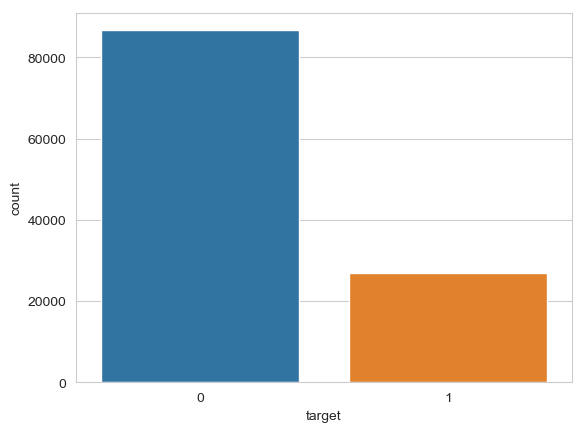

In [39]:
sns.set_style('whitegrid')
sns.countplot(x='target', data=df)

Note :
* We have to be careful since our target data are imbalance

### _Approving time, Processing time and Delivery time_

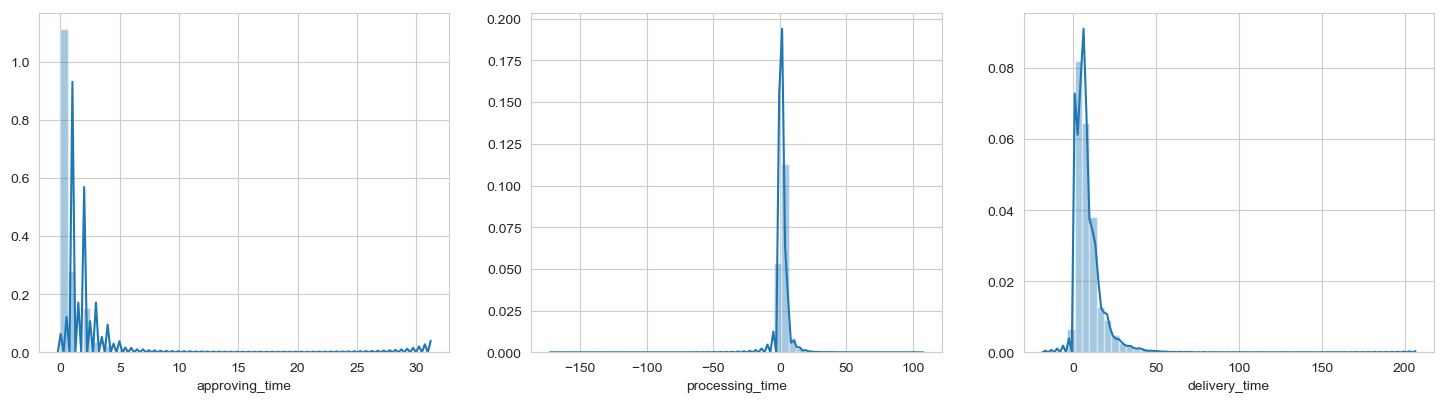

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize = (18,15))
for i, item in enumerate (df[['approving_time','processing_time','delivery_time']]):
    plt.subplot(3,3,i+1)
    sns.distplot(df[item])

there are negative value in processing time and delivery time in our data, let's check who they are

In [41]:
df[(df['processing_time'] < 0) ][['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','processing_time']]

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,processing_time
70,2018-07-22 00:00:00,2018-07-27 23:30:54,2018-07-24 15:09:00,-4
94,2018-07-21 00:00:00,2018-07-26 23:32:14,2018-07-24 15:09:00,-3
103,2018-07-04 00:00:00,2018-07-05 16:23:07,2018-07-05 14:45:00,-1
152,2018-07-04 00:00:00,2018-07-05 16:25:15,2018-07-05 14:45:00,-1
153,2018-07-04 00:00:00,2018-07-05 16:25:15,2018-07-05 14:45:00,-1
...,...,...,...,...
113357,2018-04-21 00:00:00,2018-04-24 19:20:55,2018-04-24 16:54:35,-1
113401,2018-08-22 00:00:00,2018-08-22 14:25:19,2018-08-22 13:46:00,-1
113448,2018-04-21 00:00:00,2018-04-24 19:18:16,2018-04-23 19:11:08,-2
113461,2018-07-03 00:00:00,2018-07-05 16:08:20,2018-07-04 14:05:00,-2


In [42]:
df[(df['delivery_time'] < 0) ][['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','delivery_time']].head(10)

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,delivery_time
3572,2017-07-20 00:00:00,2017-07-21 06:43:14,2017-07-28 16:57:58,2017-07-25 19:32:56,-3
3573,2017-07-20 00:00:00,2017-07-21 06:43:14,2017-07-28 16:57:58,2017-07-25 19:32:56,-3
3574,2017-07-20 00:00:00,2017-07-21 06:43:14,2017-07-28 16:57:58,2017-07-25 19:32:56,-3
6848,2017-07-20 00:00:00,2017-07-22 11:45:11,2017-08-01 18:23:30,2017-07-26 18:09:10,-7
6849,2017-07-20 00:00:00,2017-07-22 11:45:11,2017-08-01 18:23:30,2017-07-26 18:09:10,-7
6850,2017-07-20 00:00:00,2017-07-22 11:45:11,2017-08-01 18:23:30,2017-07-26 18:09:10,-7
6851,2017-07-20 00:00:00,2017-07-22 11:45:11,2017-08-01 18:23:30,2017-07-26 18:09:10,-7
6852,2017-07-20 00:00:00,2017-07-22 11:45:11,2017-08-01 18:23:30,2017-07-26 18:09:10,-7
6853,2017-07-20 00:00:00,2017-07-22 11:45:11,2017-08-01 18:23:30,2017-07-26 18:09:10,-7
6854,2017-07-20 00:00:00,2017-07-22 11:45:11,2017-08-01 18:23:30,2017-07-26 18:09:10,-7


The data which has negative processing time value are those who having order_delivered_carrier_date earlier than the order_approved_at and the data which has negative delivery time value are those who having order_delivered_customer_date earlier than the order_delivered_carrier_date. Since there must be something wrong with this data I decide to drop them

In [5]:
df = df[df['processing_time'] >= 0]
df = df[df['delivery_time'] >= 0]

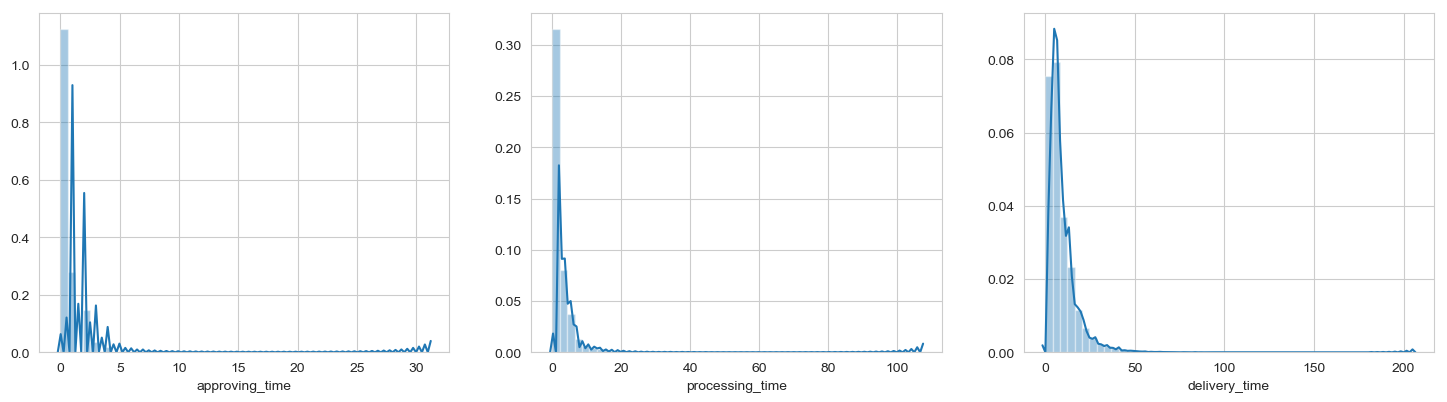

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize = (18,15))
for i, item in enumerate (df[['approving_time','processing_time','delivery_time']]):
    plt.subplot(3,3,i+1)
    sns.distplot(df[item])

In [388]:
df.describe()[['approving_time','processing_time','delivery_time']]

,approving_time,processing_time,delivery_time
count,111774.000000,111774.000000,111774.000000
mean,0.494024,2.397660,8.776585
std,0.932330,3.517013,8.630404
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,4.000000
50%,0.000000,1.000000,7.000000
75%,1.000000,3.000000,11.000000
max,31.000000,107.000000,205.000000


### _Approving Time Checking_

In [90]:
df[df['approving_time'] >= 15]['review_score'].value_counts().sort_index()

1    5
3    1
4    1
Name: review_score, dtype: int64

transaction which have more than 15 days approving_time are make sense because most of them are got 1 review_score

In [68]:
df[df['approving_time'] >= 15]['seller_id'].unique()

array(['f8db351d8c4c4c22c6835c19a46f01b0',
       'e333046ce6517bd8bb510291d44f0130',
       '002100f778ceb8431b7a1020ff7ab48f',
       'f63d8f293af3a6454377546bd9dd19ff'], dtype=object)

In [65]:
df[(df['seller_id'] == 'f63d8f293af3a6454377546bd9dd19ff') & (df['approving_time']==31)][['order_id','order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','approving_time','review_score']]

,order_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,approving_time,review_score
108879,f7923db0430587601c2aef15ec4b8af4,2018-01-20 00:00:00,2018-02-20 12:05:54,2018-02-21 18:27:12,2018-03-08 15:04:33,31,1
108880,f7923db0430587601c2aef15ec4b8af4,2018-01-20 00:00:00,2018-02-20 12:05:54,2018-02-21 18:27:12,2018-03-08 15:04:33,31,1
108881,f7923db0430587601c2aef15ec4b8af4,2018-01-20 00:00:00,2018-02-20 12:05:54,2018-02-21 18:27:12,2018-03-08 15:04:33,31,1
108882,f7923db0430587601c2aef15ec4b8af4,2018-01-20 00:00:00,2018-02-20 12:05:54,2018-02-21 18:27:12,2018-03-08 15:04:33,31,1


as we can see, there is nothing wrong with the order of time

### _Processing Time Checking_

In [87]:
df[df['processing_time'] >= 30]['review_score'].value_counts().sort_index()

1    132
2     16
3     16
4     12
5     39
Name: review_score, dtype: int64

transaction which have more than 30 days processing_time are make sense because most of them are got 1 review_score

In [78]:
df[df['processing_time'] >= 100]['seller_id'].unique()

array(['e09887ca8c7bf8a4621ce481820414ef',
       '9b522ba7eae9e1d04082f267144583cc'], dtype=object)

In [80]:
df[df['seller_id'] == 'e09887ca8c7bf8a4621ce481820414ef'][['order_id','order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','processing_time','review_score']]

,order_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,processing_time,review_score
98101,8b7fd198ad184563c231653673e75a7f,2017-11-14 00:00:00,2017-11-17 08:47:00,2018-02-26 17:27:15,2018-02-27 18:05:08,101,1
98102,bf7dc02ad247527a27900abb19306a3c,2017-09-09 00:00:00,2017-09-09 08:45:12,2017-09-14 17:12:06,2017-09-19 18:42:16,5,5
98103,bf7dc02ad247527a27900abb19306a3c,2017-09-09 00:00:00,2017-09-09 08:45:12,2017-09-14 17:12:06,2017-09-19 18:42:16,5,5


as we can see, there is nothing wrong with the order of time

### _Delivery Time Checking_

In [85]:
df[df['delivery_time'] >= 50]['review_score'].value_counts().sort_index()

1    311
2     35
3     37
4     36
5     57
Name: review_score, dtype: int64

transaction which have more than 50 days delivery_time are make sense because most of them are got 1 review_score

###  _Approving Time_

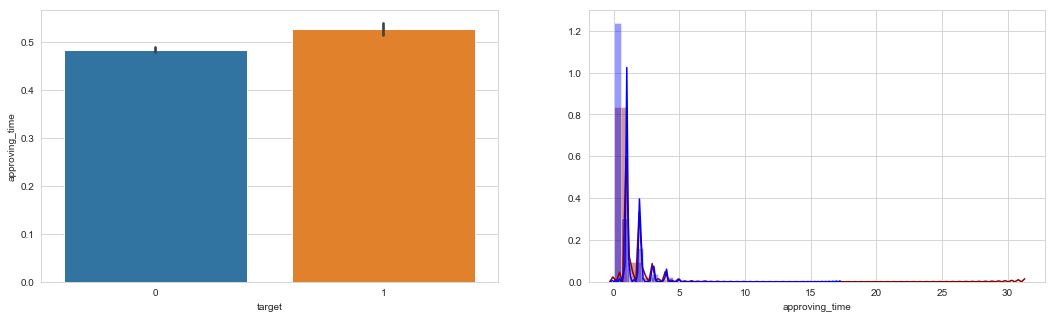

In [71]:
sns.set_style('whitegrid')
fig = plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.barplot(x='target', y='approving_time', data=df)
plt.subplot(1,2,2)
sns.distplot(df[df['target'] == 1]['approving_time'], color='darkred', bins=30)
sns.distplot(df[df['target'] == 0]['approving_time'], color='blue', bins=30)

### _Processing Time_

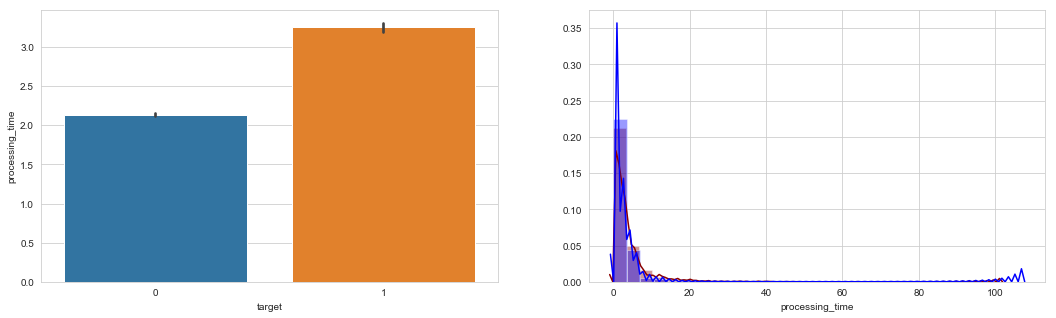

In [72]:
fig = plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.barplot(x='target', y='processing_time', data=df)
plt.subplot(1,2,2)
sns.distplot(df[df['target'] == 1]['processing_time'], color='darkred', bins=30)
sns.distplot(df[df['target'] == 0]['processing_time'], color='blue', bins=30)

### _Delivery Time_

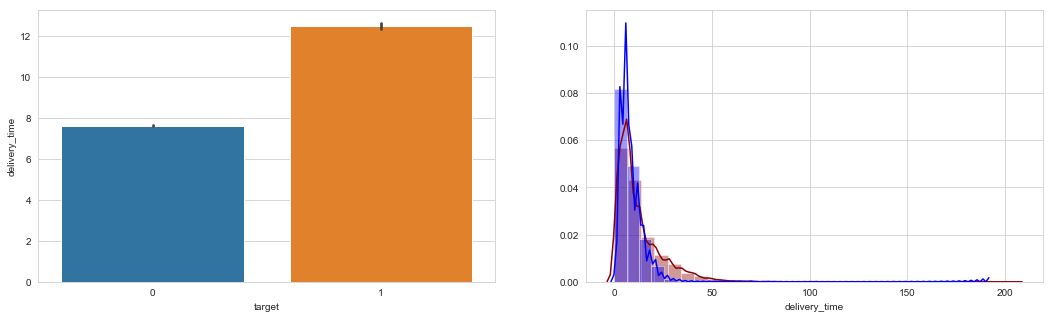

In [91]:
fig = plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.barplot(x='target', y='delivery_time', data=df)
plt.subplot(1,2,2)
sns.distplot(df[df['target'] == 1]['delivery_time'], color='darkred', bins=30)
sns.distplot(df[df['target'] == 0]['delivery_time'], color='blue', bins=30)

Note :
* its clear since higher number of approving time, processing time and delivery time lead to unsatisfied customer
* those 3 variable are explained really well about unsatisfied transaction, but those 3 variable only are not enough to seperate between satisfied and unsatisfied transaction

<br>

### _Seller on time and Courier on time_

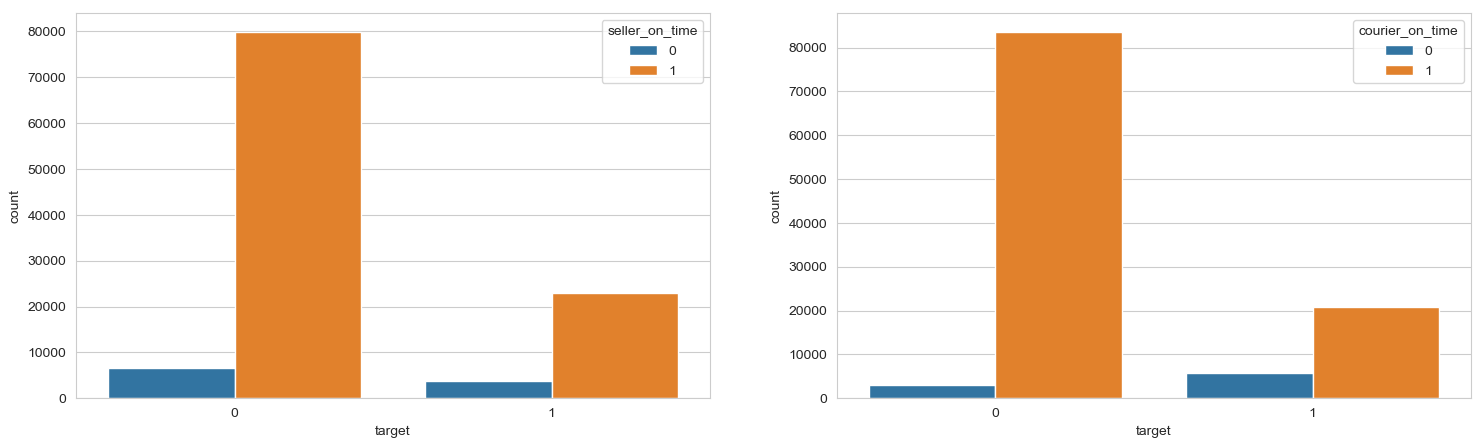

In [373]:
fig = plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.countplot(x='target', hue='seller_on_time', data=df)
plt.subplot(1,2,2)
sns.countplot(x='target', hue='courier_on_time', data=df)

Note :
* the number of unsatisfied customer decreased  when seller and courier are on time 
* when courier are late the number of unsatisfied customer increased but when seller are late the number of unsatisfied customer decreased

<br>

### _Better Product and Seller Rating_

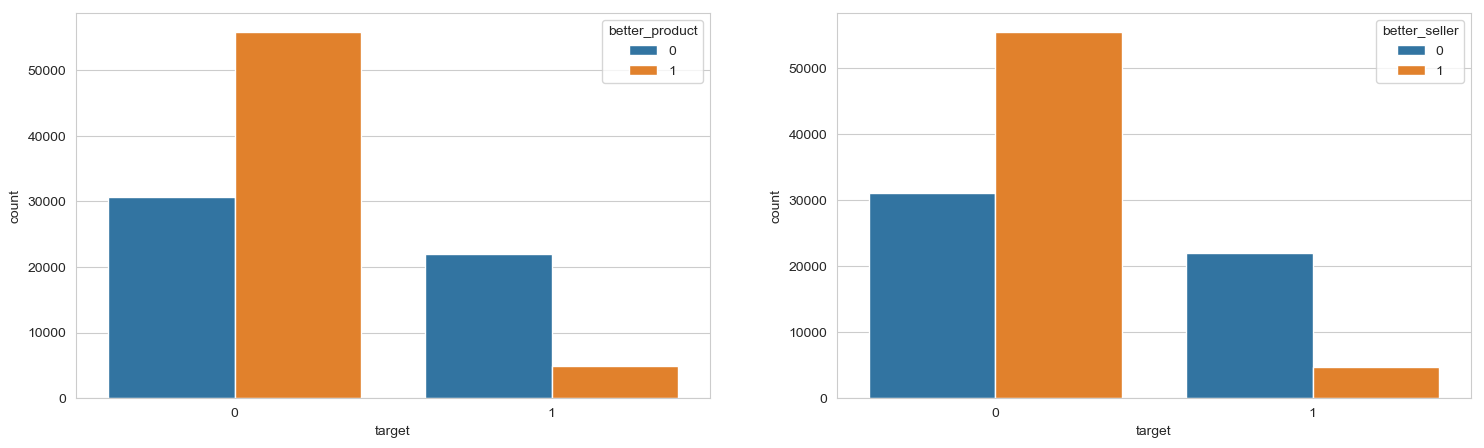

In [374]:
fig = plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.countplot(x='target', hue='better_product', data=df)
plt.subplot(1,2,2)
sns.countplot(x='target', hue='better_seller', data=df)

Note :
* better_product indicated that the product have a better rating than the average product in that category while better_seller indicated that the seller have a better rating than the average seller in that category
* better_product and better_seller have significant effect to unsatisfied cutomer

### _Quantity, Product Price and Freight Rate_

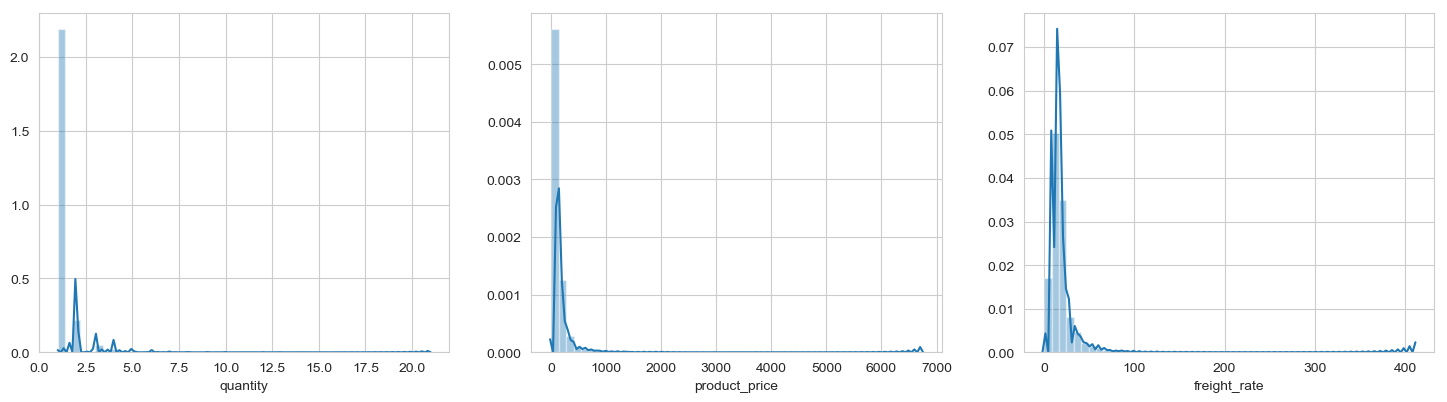

In [395]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize = (18,15))
for i, item in enumerate (df[['quantity','product_price','freight_rate']]):
    plt.subplot(3,3,i+1)
    sns.distplot(df[item])

In [399]:
df[['quantity','product_price','freight_rate']].describe()

,quantity,product_price,freight_rate
count,111088.000000,111088.000000,111088.000000
mean,1.196853,119.628958,18.665968
std,0.704746,181.409476,15.487194
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,11.850000
50%,1.000000,74.800000,15.570000
75%,1.000000,132.225000,20.020000
max,21.000000,6735.000000,409.680000


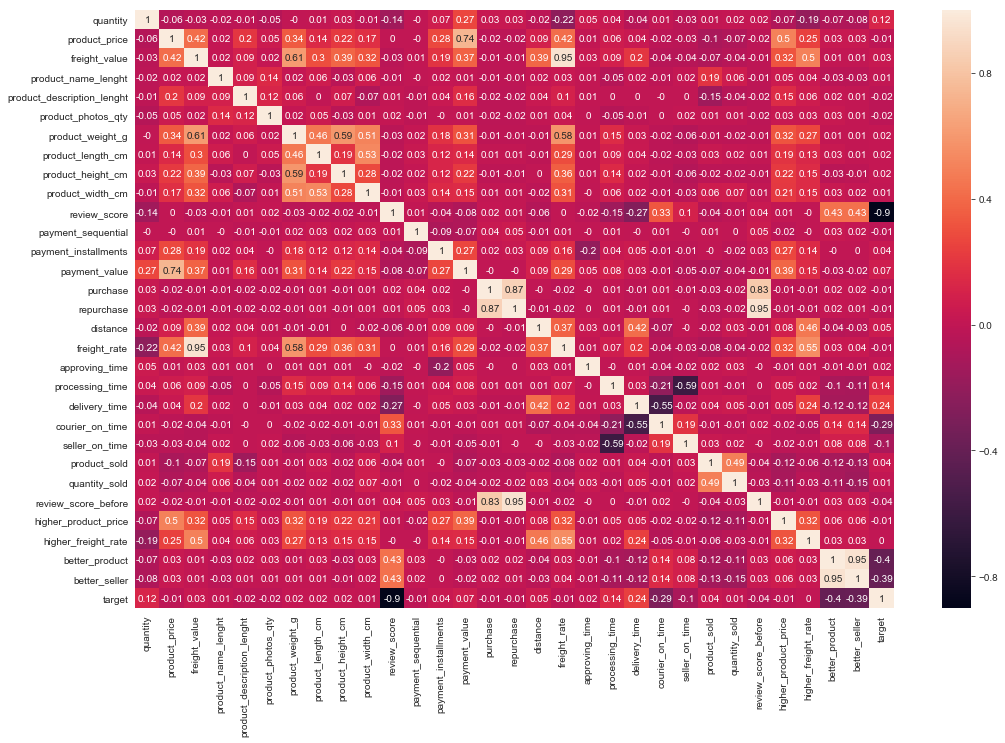

In [94]:
plt.figure(figsize=(17,11))
sns.heatmap(round(df.corr(),2), annot=True)

* product_price is having positive correlation with product_weight_g, product_length_cm, product_height_cm and product_width_cm.

In [113]:
df[['product_weight_g','product_length_cm','product_height_cm','product_width_cm','product_price']].describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_price
count,111851.000000,111851.000000,111851.000000,111851.000000,111851.000000
mean,2112.700307,30.305523,16.642060,23.105757,120.154868
std,3775.020949,16.163087,13.467032,11.723774,182.923755
min,0.000000,7.000000,2.000000,6.000000,0.850000
25%,300.000000,18.000000,8.000000,15.000000,39.900000
50%,700.000000,25.000000,13.000000,20.000000,74.900000
75%,1800.000000,38.000000,20.000000,30.000000,133.200000
max,40425.000000,105.000000,105.000000,118.000000,6735.000000


In [109]:
df[(df['product_price'] == 6735)][['product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm','product_category','product_price']]

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category,product_price
111497,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,6735.0


In [105]:
df[df['product_category'] == 'housewares'][['product_weight_g','product_length_cm','product_height_cm','product_width_cm','product_price']].describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_price
count,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000
mean,3230.643457,32.206607,24.187811,24.892638,90.603409
std,4571.319066,15.279095,16.945417,10.334818,141.726052
min,50.000000,10.000000,2.000000,11.000000,3.060000
25%,505.000000,21.000000,12.000000,16.000000,32.000000
50%,1200.000000,30.000000,20.000000,25.000000,59.200000
75%,3800.000000,40.000000,30.000000,30.000000,110.000000
max,30000.000000,105.000000,105.000000,90.000000,6735.000000


the product which have 6735 product_price is make sense since the product_weight, product_length, product_height and product_width is higher than the average in those category or the entire product

In [464]:
df[df['freight_rate'] == 409.68][['customer_city','seller_city','distance','freight_rate']]

,customer_city,seller_city,distance,freight_rate
100978,sao raimundo nonato,apucarana,1865,409.68


In [107]:
df[df['freight_rate'] == 409.68][['product_weight_g','product_length_cm','product_height_cm','product_width_cm','product_price','product_category']]

,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_price,product_category
97564,14675.0,55.0,64.0,52.0,979.0,baby


since I can't find any source to validate the real freight rate from sao raimundo nonato to apucarana, let's take a look from our data

In [468]:
df[df['customer_city'] == 'sao raimundo nonato'][['customer_city','seller_city','distance','freight_rate']]

,customer_city,seller_city,distance,freight_rate
30017,sao raimundo nonato,campo limpo paulista,1637,35.70
31896,sao raimundo nonato,sao paulo,1670,60.54
33921,sao raimundo nonato,rio de janeiro,1544,36.08
33922,sao raimundo nonato,rio de janeiro,1544,18.04
33923,sao raimundo nonato,rio de janeiro,1544,12.03
48074,sao raimundo nonato,sao paulo,1676,56.90
48075,sao raimundo nonato,sao paulo,1676,28.45
48076,sao raimundo nonato,sao paulo,1676,18.97
53589,sao raimundo nonato,salto,1653,24.84
89501,sao raimundo nonato,sao paulo,1670,31.95


In [470]:
df[df['seller_city'] == 'apucarana'][['customer_city','seller_city','distance','freight_rate']]

,customer_city,seller_city,distance,freight_rate
59048,sao paulo,apucarana,506,13.47
59049,assis chateaubriand,apucarana,228,13.47
59050,ponta grossa,apucarana,214,13.47
59051,ponta grossa,apucarana,214,6.74
59052,aguas da prata,apucarana,519,22.93
...,...,...,...,...
112495,sao jose dos campos,apucarana,569,22.31
112918,sao paulo,apucarana,480,14.52
113000,imbituba,apucarana,586,15.45
113001,uirauna,apucarana,2353,42.73


there is no another transaction from sao raimundo nonato to apucarana so we can't validate those freight_rate

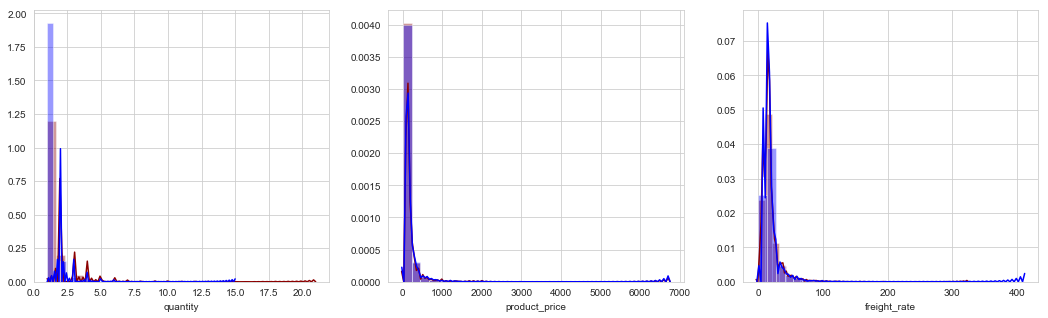

In [116]:
fig = plt.figure(figsize = (18,5))
plt.subplot(1,3,1)
sns.distplot(df[df['target'] == 1]['quantity'], color='darkred', bins=30)
sns.distplot(df[df['target'] == 0]['quantity'], color='blue', bins=30)
plt.subplot(1,3,2)
sns.distplot(df[df['target'] == 1]['product_price'], color='darkred', bins=30)
sns.distplot(df[df['target'] == 0]['product_price'], color='blue', bins=30)
plt.subplot(1,3,3)
sns.distplot(df[df['target'] == 1]['freight_rate'], color='darkred', bins=30)
sns.distplot(df[df['target'] == 0]['freight_rate'], color='blue', bins=30)

since the distribution of quantity, product_price and freigh_rate on satisfied and unsatisfied transaction are similar so those three features alone are not enough to separate between satisfied and unsatisfied transaction

### _Product Sold and Quantity Sold_

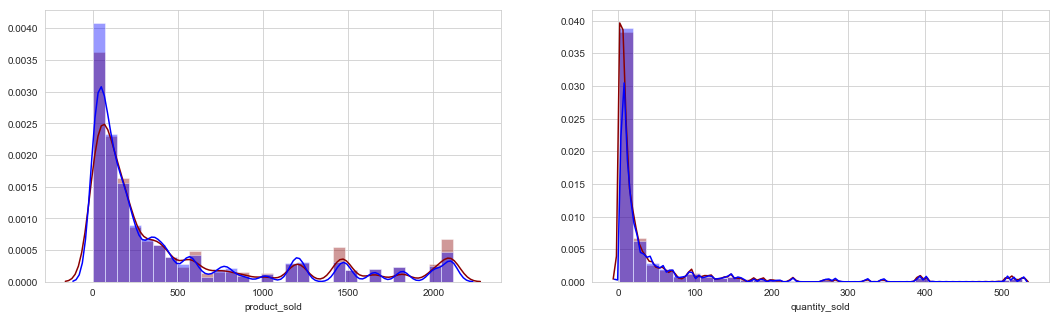

In [117]:
fig = plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.distplot(df[df['target'] == 1]['product_sold'], color='darkred', bins=30)
sns.distplot(df[df['target'] == 0]['product_sold'], color='blue', bins=30)
plt.subplot(1,2,2)
sns.distplot(df[df['target'] == 1]['quantity_sold'], color='darkred', bins=30)
sns.distplot(df[df['target'] == 0]['quantity_sold'], color='blue', bins=30)

<br>

### _Product Category_

In [152]:
df[df['review_score'] == 5]['product_category'].value_counts()

bed_bath_table               6149
health_beauty                6001
sports_leisure               5257
furniture_decor              4676
computers_accessories        4327
                             ... 
home_comfort_2                 13
diapers_and_hygiene            12
la_cuisine                     11
cds_dvds_musicals              10
fashion_childrens_clothes       7
Name: product_category, Length: 70, dtype: int64

In [54]:
cat1 = df[df['review_score'] == 5]['product_category'].value_counts().index

In [168]:
dff1 = df[(df['product_category'] == cat1[0]) | (df['product_category'] == cat1[1]) | (df['product_category'] == cat1[2]) | (df['product_category'] == cat1[3]) | (df['product_category'] == cat1[4])]

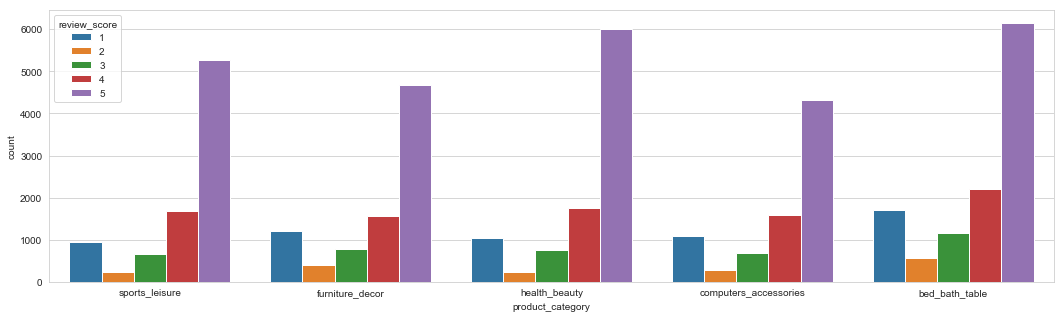

In [174]:
sns.set_style('whitegrid')
fig = plt.figure(figsize = (18,5))
sns.countplot(x='product_category', hue='review_score', data=dff1)

In [172]:
df[df['review_score'] == 1]['product_category'].value_counts()

bed_bath_table                           1710
furniture_decor                          1203
computers_accessories                    1079
health_beauty                            1034
sports_leisure                            938
                                         ... 
small_appliances_home_oven_and_coffee       4
arts_and_craftmanship                       3
fashio_female_clothing                      3
fashion_sport                               1
security_and_services                       1
Name: product_category, Length: 69, dtype: int64

In [178]:
cat2 = df[df['review_score'] == 1]['product_category'].value_counts().index

In [175]:
dff2 = df[(df['product_category'] == cat2[0]) | (df['product_category'] == cat2[1]) | (df['product_category'] == cat2[2]) | (df['product_category'] == cat2[3]) | (df['product_category'] == cat2[4])]

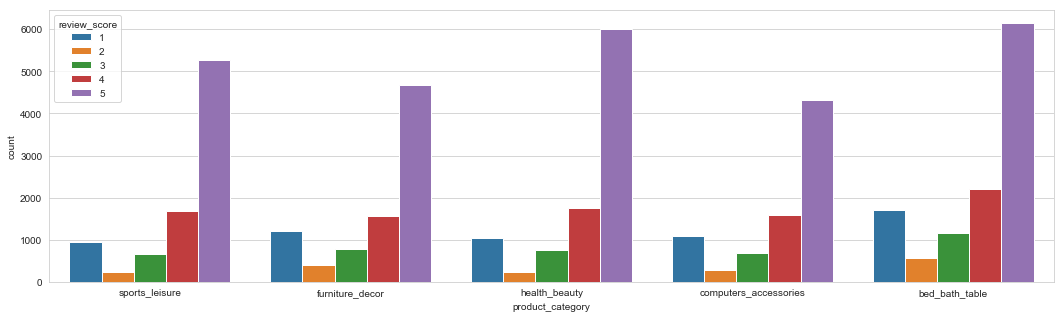

In [176]:
sns.set_style('whitegrid')
fig = plt.figure(figsize = (18,5))
sns.countplot(x='product_category', hue='review_score', data=dff2)

top 5 product_category which have the most 5 review_score are the same with 5 product_category which have the most 1 review_score

### _Payment Sequential_

In [17]:
df['payment_sequential'].value_counts().sort_index()

1     108630
2       3249
3        632
4        304
5        181
6        124
7         85
8         55
9         44
10        38
11        34
12        26
13        14
14        12
15        10
16         8
17         8
18         8
19         8
20         5
21         5
22         2
23         1
24         1
25         1
26         1
Name: payment_sequential, dtype: int64

In [18]:
df[df['payment_sequential'] == 26]['product_id'].unique()

array(['8d37ee446981d3790967d0268d6cfc81'], dtype=object)

In [33]:
df[df['product_id'] == '8d37ee446981d3790967d0268d6cfc81'][['order_id','product_id','customer_id','order_purchase_timestamp','purchase','payment_sequential','payment_installments','payment_value','payment_type']].sort_values('payment_sequential')

,order_id,product_id,customer_id,order_purchase_timestamp,purchase,payment_sequential,payment_installments,payment_value,payment_type
5693,7e3fefb35b0b1d765a343618ca5d454c,8d37ee446981d3790967d0268d6cfc81,f0c0ed957add2cc4abeb60ade9ad6d19,2017-06-14 00:00:00,1,1,8,303.53,credit_card
5825,ccf804e764ed5650cd8759557269dc13,8d37ee446981d3790967d0268d6cfc81,92cd3ec6e2d643d4ebd0e3d6238f69e2,2017-06-07 00:00:00,1,1,1,2.20,credit_card
5850,b25816accd207ba3b12d0f4f5ab66793,8d37ee446981d3790967d0268d6cfc81,b083f0e18786dedb0e67746c7b49555d,2017-05-26 00:00:00,1,1,1,66.10,boleto
5823,7ca8c6011b3587c9b445d53f3f9adb7a,8d37ee446981d3790967d0268d6cfc81,968ce67a6406f9ce7d36c002b9a018f4,2017-08-05 00:00:00,1,1,1,74.64,boleto
5830,ccf804e764ed5650cd8759557269dc13,8d37ee446981d3790967d0268d6cfc81,92cd3ec6e2d643d4ebd0e3d6238f69e2,2017-06-07 00:00:00,1,2,1,1.45,voucher
5833,ccf804e764ed5650cd8759557269dc13,8d37ee446981d3790967d0268d6cfc81,92cd3ec6e2d643d4ebd0e3d6238f69e2,2017-06-07 00:00:00,1,3,1,1.15,voucher
5848,ccf804e764ed5650cd8759557269dc13,8d37ee446981d3790967d0268d6cfc81,92cd3ec6e2d643d4ebd0e3d6238f69e2,2017-06-07 00:00:00,1,4,1,0.99,voucher
5832,ccf804e764ed5650cd8759557269dc13,8d37ee446981d3790967d0268d6cfc81,92cd3ec6e2d643d4ebd0e3d6238f69e2,2017-06-07 00:00:00,1,5,1,2.69,voucher
5828,ccf804e764ed5650cd8759557269dc13,8d37ee446981d3790967d0268d6cfc81,92cd3ec6e2d643d4ebd0e3d6238f69e2,2017-06-07 00:00:00,1,6,1,2.26,voucher
5834,ccf804e764ed5650cd8759557269dc13,8d37ee446981d3790967d0268d6cfc81,92cd3ec6e2d643d4ebd0e3d6238f69e2,2017-06-07 00:00:00,1,7,1,1.60,voucher


* payment sequential is the numbers of payment method use by customer in a single transaction
* transaction which has more than 1 payment sequential are written more than one in the dataset because each payment method has a different payment_value

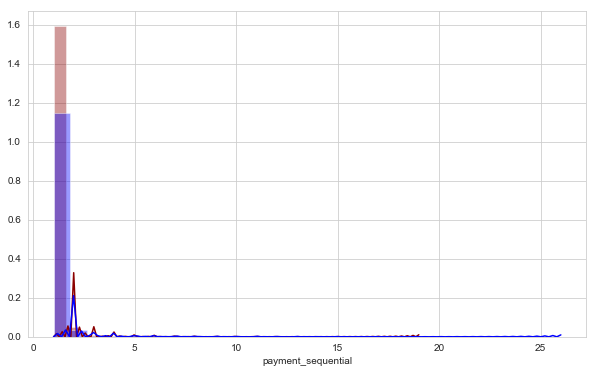

In [53]:
fig = plt.figure(figsize = (10,6))
sns.distplot(df[df['target'] == 1]['payment_sequential'], color='darkred', bins=30)
sns.distplot(df[df['target'] == 0]['payment_sequential'], color='blue', bins=30)

### _Payment Installment_

In [28]:
df['payment_installments'].value_counts().sort_index()

0         3
1     56531
2     13190
3     11347
4      7722
5      5822
6      4464
7      1742
8      4877
9       703
10     6662
11       24
12      162
13       18
14       15
15       90
16        7
17        7
18       38
20       20
21        6
22        1
23        1
24       34
Name: payment_installments, dtype: int64

In [38]:
df[df['payment_installments'] > 1]['payment_type'].value_counts()

credit_card    56952
Name: payment_type, dtype: int64

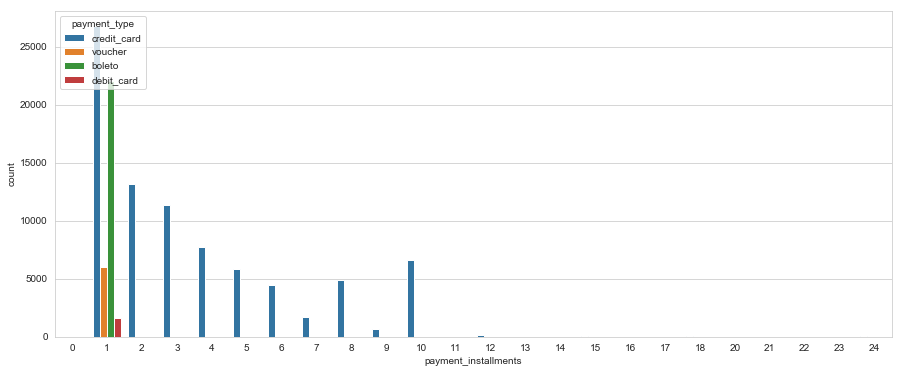

In [43]:
fig = plt.figure(figsize = (15,6))
sns.countplot(x='payment_installments', hue='payment_type', data=df)

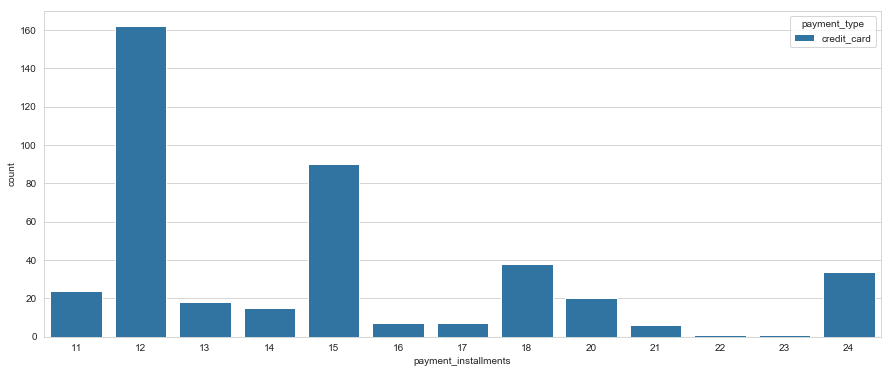

In [47]:
fig = plt.figure(figsize = (15,6))
sns.countplot(x='payment_installments', hue='payment_type', data=df[df['payment_installments'] > 10])

* all of the transaction which has more than 2 payment installments are paid using credit card

In [30]:
df[df['payment_installments'] == 24]['product_id'].unique()

array(['59ebd2c07d59483d0855b5b3d5e18728',
       '7ea0b63dc9b8264702f2d2c1533fb4ae',
       'c1eee16d856657ad280936810ef3d080',
       '97c948ebc8c04b26b7bbb095d4228f2a',
       '717e96fd0fc2d06fe158982bce5e6a8f',
       'c2a5a6287738cda59406d1f595207d7b',
       '43944a8f8f0b7ae86b6c3d3c2f257375',
       '01da7f08d8327e0b4fab7edaa0c417a4',
       '431d674f9a4fbd0957ecf6ba3fcb6899',
       'cd9895374edea6a67749d331b0b32070',
       '8474d936fee23f0c45620cc2022871cc',
       '9ad536de496ccba6e4a9ac7be933ad9d',
       '58efb9b638561ce132216a9a612513e2',
       '872db866d615db59612ac933f43d6b22',
       '73fdc89a7474d12e91ebb4a38341fd84',
       'c1afa44a5a60e2e7cf7280e57eba0597',
       '2be7c0f7dd57742c970f856ec64bc25e',
       '96a5ff4a6e07ebe2f09a6ee132303df3',
       '599dc392f7a23273471b068d72408224',
       'e86b81dcac341ea01df0260077cdf082',
       '1a73ae8aa2b02829f07c8d5ec7bbd659',
       '00bb62ea3729537a687c3fddcd123662'], dtype=object)

In [35]:
df[df['product_id'] == '59ebd2c07d59483d0855b5b3d5e18728'][['order_id','product_id','customer_id','order_purchase_timestamp','purchase','payment_sequential','payment_installments','payment_value','payment_type']]

,order_id,product_id,customer_id,order_purchase_timestamp,purchase,payment_sequential,payment_installments,payment_value,payment_type
10270,0cc25005d4c6ad2b8ca080644cee93d8,59ebd2c07d59483d0855b5b3d5e18728,00694a1bf2da47e37b2bd3193eeae839,2017-11-24 00:00:00,1,1,1,35.77,boleto
10271,9e1813e190e6bbc1b75385fc8c7d7202,59ebd2c07d59483d0855b5b3d5e18728,af2737c9aae345ba99928fb67331c3c5,2018-01-28 00:00:00,1,1,1,44.78,credit_card
10272,a640ba87425649e9ade65bed151f3b30,59ebd2c07d59483d0855b5b3d5e18728,7e6190337e2b2692cce976c62140a13e,2018-03-27 00:00:00,1,1,3,35.38,credit_card
10273,3942129663d1d1392c8da657a08422a4,59ebd2c07d59483d0855b5b3d5e18728,5d2ec729a53068e4a9a9d1ab4a428d17,2017-12-12 00:00:00,1,1,2,42.09,credit_card
10274,8426c20fc1f780e653122762baef129e,59ebd2c07d59483d0855b5b3d5e18728,e432b25f546d2cc6643c25d070e75c62,2017-12-16 00:00:00,1,1,3,39.84,credit_card
10275,a92635cfd1b863f3c3c225dcab38d0be,59ebd2c07d59483d0855b5b3d5e18728,1c6e0cf070d06c8e0d67cd1aeab03ef6,2018-03-22 00:00:00,1,1,4,43.22,credit_card
10276,7053a93a4b7b5a66f27138c4bf8e1307,59ebd2c07d59483d0855b5b3d5e18728,91cc176c80a752e26946e32b24b00194,2018-03-29 00:00:00,1,1,3,35.38,credit_card
10277,a5500fc87a64d9d7f3ee98bdc7b25838,59ebd2c07d59483d0855b5b3d5e18728,34a00627e6ef9fa9a9938f788a765926,2017-11-26 00:00:00,1,1,1,42.09,credit_card
10278,70b7e94ea46d3e8b5bc12a50186edaf0,59ebd2c07d59483d0855b5b3d5e18728,1c4c6fd6cfc21396ae93680bfc5c34d4,2018-01-01 00:00:00,1,1,24,274.84,credit_card
10281,3a85a31b3c013689dec78b3b5a951e3a,59ebd2c07d59483d0855b5b3d5e18728,7b13faf41f9f9fbf81d94f7dc0390ad6,2018-03-18 00:00:00,1,1,1,46.22,boleto


* even the transaction has 24 payment installment, it written once in the dataset

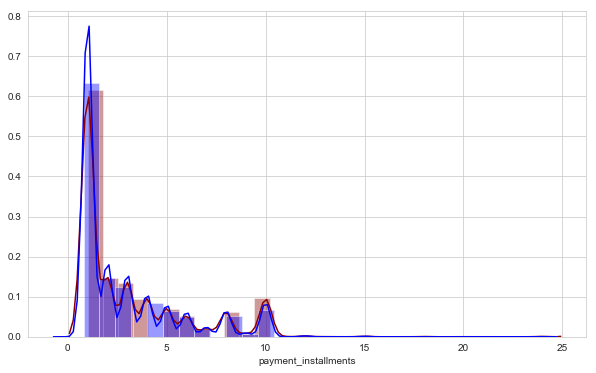

In [52]:
fig = plt.figure(figsize = (10,6))
sns.distplot(df[df['target'] == 1]['payment_installments'], color='darkred', bins=30)
sns.distplot(df[df['target'] == 0]['payment_installments'], color='blue', bins=30)

### _Payment Type_

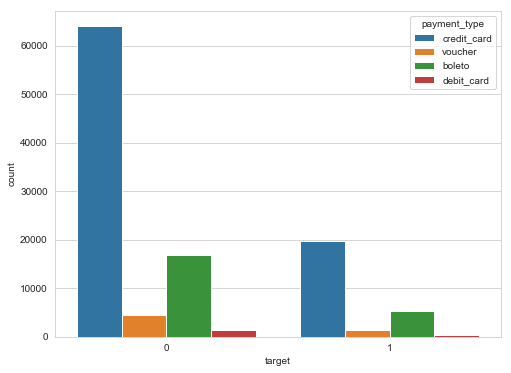

In [557]:
sns.set_style('whitegrid')
fig = plt.figure(figsize = (8,6))
sns.countplot(x='target', hue='payment_type', data=df)

### _Dropping Unnecessary Columns_

In [6]:
df = df.drop(['review_score','seller_city','customer_city','order_id','seller_id','product_rating','seller_rating','stop_purchasing','avg_price','avg_product_rating','avg_seller_rating','avg_freight','customer_id','product_id','customer_unique_id','order_status','shipping_limit_date','review_id','review_comment_title','review_comment_message','review_creation_date','review_answer_timestamp','seller_lat','sellet_lng','customer_lat','customer_lng','order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'], axis=1)

In [7]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111851 entries, 0 to 113485
Data columns (total 32 columns):
quantity                      111851 non-null int64
product_price                 111851 non-null float64
freight_value                 111851 non-null float64
product_name_lenght           111851 non-null float64
product_description_lenght    111851 non-null float64
product_photos_qty            111851 non-null float64
product_weight_g              111851 non-null float64
product_length_cm             111851 non-null float64
product_height_cm             111851 non-null float64
product_width_cm              111851 non-null float64
product_category              111851 non-null object
payment_sequential            111851 non-null int64
payment_type                  111851 non-null object
payment_installments          111851 non-null int64
payment_value                 111851 non-null float64
purchase                      111851 non-null int64
repurchase                    11185

# _Detail Information for Each Columns in Final Data Frame_

In [64]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                   round((df[col].isna().sum()/len(df[col])) *100 , 2),
                   df[col].nunique(), list(df[col].unique()[:2])])

dfDesc = pd.DataFrame(columns=['Features', 'Data Type', 'NaN', 'NaN(%)', 'Unique', 'Unique Sample'], data=listItem)
dfDesc

,Features,Data Type,NaN,NaN(%),Unique,Unique Sample
0,quantity,int64,0,0.0,21,"[1, 2]"
1,product_price,float64,0,0.0,5730,"[29.99, 75.9]"
2,freight_value,float64,0,0.0,6847,"[8.72, 7.78]"
3,product_name_lenght,float64,0,0.0,65,"[40.0, 58.0]"
4,product_description_lenght,float64,0,0.0,2938,"[268.0, 398.0]"
5,product_photos_qty,float64,0,0.0,19,"[4.0, 3.0]"
6,product_weight_g,float64,0,0.0,2157,"[500.0, 238.0]"
7,product_length_cm,float64,0,0.0,99,"[19.0, 20.0]"
8,product_height_cm,float64,0,0.0,102,"[8.0, 10.0]"
9,product_width_cm,float64,0,0.0,94,"[13.0, 15.0]"


<br>

# _Data Frame_

### Checking Correlation

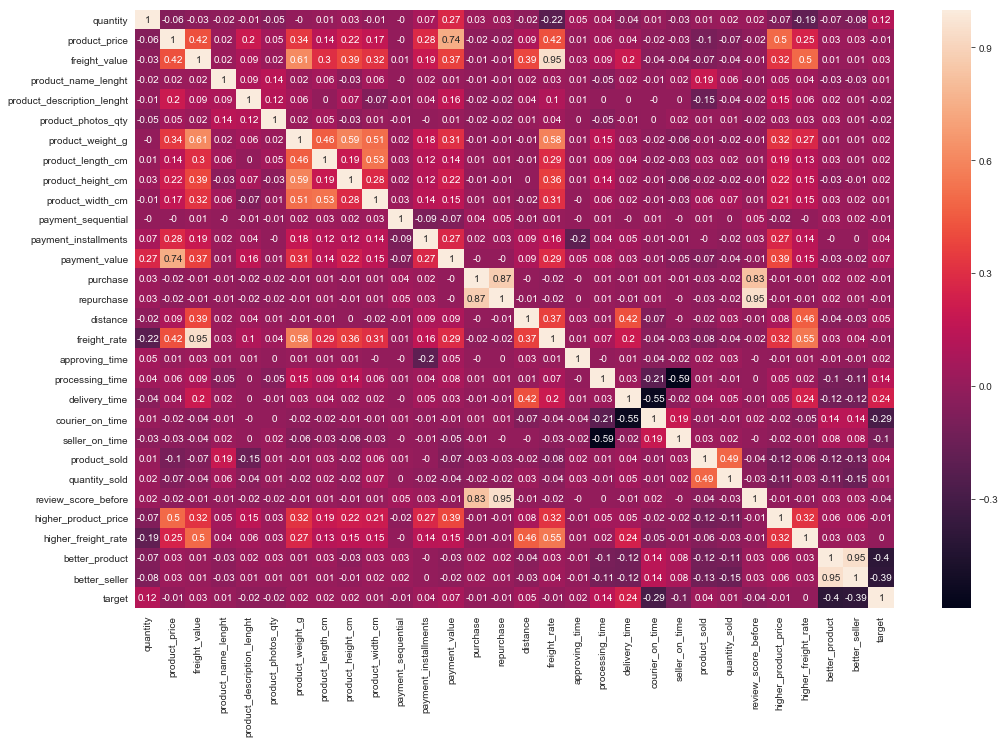

In [212]:
plt.figure(figsize=(17,11))
sns.heatmap(round(df.corr(),2), annot=True)

# Note :<br>
There are several Independent Variable that have strong correlation between each other so we can drop one of them<br>
Some Independent Variable that have strong correlation those are :
* freight_value and freight_rate (0.95)
* better_product and better_seller (0.95)
* review_score_before and repurchase (0.91)

### ---------------------------------------------------------------------

In [9]:
df = df.drop(['freight_rate','better_seller','repurchase'], axis=1)

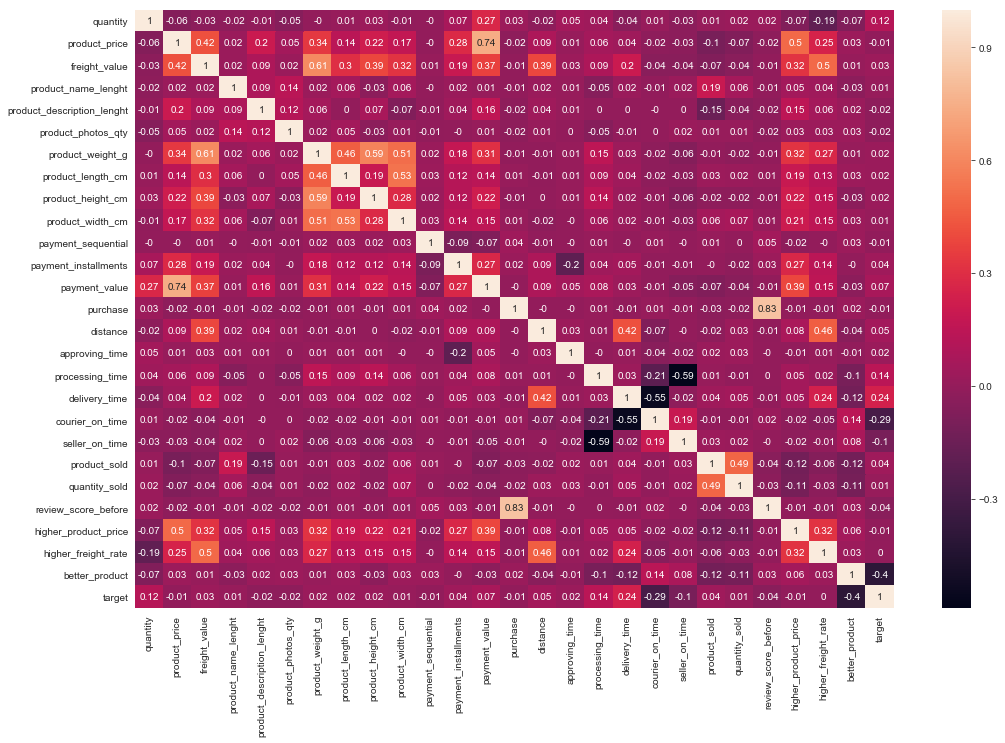

In [214]:
plt.figure(figsize=(17,11))
sns.heatmap(round(df.corr(),2), annot=True)

# _Selecting Best Model_

Lets creating 4 DataFrame, those are:
* Unstandardized Data Frame and processing using label encoder for Decision Tree, Random Forest, and XGBoost 
* Data Frame which standardized by MinMax Scaller for KNN and SVM
* Data Frame which standardized by StandarScaler for KNN and SVM
* Unstandardized Data Frame and processing using binary encoder for Logistic Regression

# _1st Data Frame_ 

In [10]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df1 = df
df1['productx'] = label.fit_transform(df1['product_category'])
df1['paymentx'] = label.fit_transform(df1['payment_type'])
df1 = df1.drop(['product_category','payment_type'], axis=1)

<Figure size 1224x792 with 0 Axes>

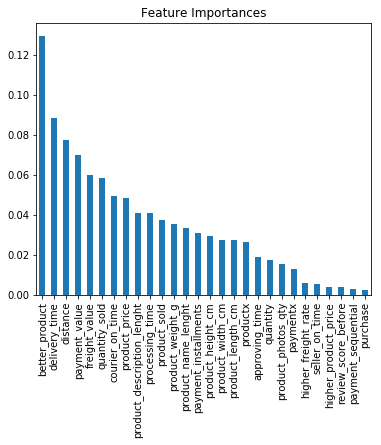

In [11]:
from sklearn.ensemble import RandomForestClassifier
plt.figure(figsize=(17,11))
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(df1.drop('target', axis=1), df1['target'])
plt.figure(figsize=(6,5))
plt.grid(True)
coef1 = pd.Series(rfc.feature_importances_, df1.drop('target', axis=1).columns).sort_values(ascending=False)
coef1.plot(kind='bar', title='Feature Importances')

From feature importance we can see that there are several feature that not really important so we can drop them

#### _Droping Columns_

In [217]:
df1 = df1.drop(['approving_time','quantity','product_photos_qty','paymentx','higher_freight_rate','seller_on_time','higher_product_price','review_score_before','payment_sequential','purchase'], axis=1)

### _Spliting_

In [218]:
from sklearn.model_selection import train_test_split
x1Train, x1Test, y1Train, y1Test = train_test_split(
    df1.drop('target', axis=1), df1['target'],
    test_size = .1
)

In [76]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score

# _Decision Tree Classifier_

### _Selecting Best Estimator For Good Recall Score_

In [221]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
searchDT = GridSearchCV(estimator = DT,
                     param_grid = {
                         'min_samples_split' : [2,5,10],
                         'max_depth' : [5,10,20],
                         'class_weight' : [{0:1,1:4},{0:1,1:6},{0:1,1:8},None]
                     }, scoring='recall',
                     cv=2,
                     n_jobs = -1)

In [222]:
searchDT.fit(df1.drop('target', axis=1), df1['target'])

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 4}, {0: 1, 1: 6},
                                          {0: 1, 1: 8}, None],
     

### _Model Fitting_

In [223]:
searchDT.best_estimator_

DecisionTreeClassifier(class_weight={0: 1, 1: 8}, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [224]:
modelDT = searchDT.best_estimator_
modelDT.fit(x1Train, y1Train)
print('DecisionTreeClassifier Score =',modelDT.score(x1Train, y1Train))

DecisionTreeClassifier Score = 0.5692445239159589


### _Train Evaluation_

In [225]:
prediction = modelDT.predict(x1Train)
print(classification_report(y1Train,prediction))
print(confusion_matrix(y1Train, prediction))

              precision    recall  f1-score   support

           0       0.96      0.45      0.62     76842
           1       0.35      0.94      0.51     23823

    accuracy                           0.57    100665
   macro avg       0.66      0.70      0.56    100665
weighted avg       0.82      0.57      0.59    100665

[[34848 41994]
 [ 1368 22455]]


### _Test Evaluation_

In [226]:
prediction = modelDT.predict(x1Test)
print(classification_report(y1Test,prediction))
print(confusion_matrix(y1Test, prediction))

              precision    recall  f1-score   support

           0       0.96      0.45      0.61      8539
           1       0.35      0.95      0.51      2647

    accuracy                           0.56     11186
   macro avg       0.65      0.70      0.56     11186
weighted avg       0.82      0.56      0.59     11186

[[3805 4734]
 [ 144 2503]]


### _ROC AUC_

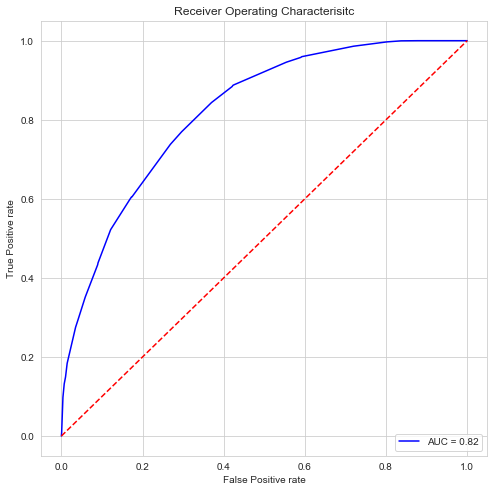

In [267]:
preds = modelDT.predict_proba(x1Test)[:,1]
fpr, tpr, threshold = roc_curve(y1Test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,8))
plt.grid(True)
plt.title('Receiver Operating Characterisitc')
plt.plot(fpr, tpr, 'b', label='AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()

We can change the threshold to get better recall score but we can't get score 1.0 because there is no straight line for TPR valued 1.0 but we can get close into it

In [268]:
datax = pd.DataFrame({
    'FPR' : fpr,
    'TPR' : tpr,
    'Threshold' : threshold
})

In [269]:
datax[datax['TPR'] >= 0.9]

,FPR,TPR,Threshold
21,0.554397,0.945599,0.503494
22,0.589882,0.957688,0.477198
23,0.592458,0.959577,0.462929
24,0.719991,0.986022,0.360910
25,0.802319,0.996978,0.243944
26,0.836983,0.999622,0.133205
27,0.878557,1.000000,0.009289
28,1.000000,1.000000,0.000000


I decided to choose 0.243944 as the threshold since it having 0.996978 TPR value

### _New Train Evaluation_

In [237]:
prediction = [1 if item[1] > 0.243944  else 0 for item in modelDT.predict_proba(x1Train)]
print(classification_report(y1Train,prediction))
print(confusion_matrix(y1Train, prediction))

              precision    recall  f1-score   support

           0       1.00      0.20      0.33     76842
           1       0.28      1.00      0.44     23823

    accuracy                           0.39    100665
   macro avg       0.64      0.60      0.39    100665
weighted avg       0.83      0.39      0.36    100665

[[15457 61385]
 [   56 23767]]


### _New Test Evaluation_

In [238]:
prediction = [1 if item[1] > 0.243944  else 0 for item in modelDT.predict_proba(x1Test)]
print(classification_report(y1Test,prediction))
print(confusion_matrix(y1Test, prediction))

              precision    recall  f1-score   support

           0       1.00      0.20      0.33      8539
           1       0.28      1.00      0.43      2647

    accuracy                           0.39     11186
   macro avg       0.64      0.60      0.38     11186
weighted avg       0.83      0.39      0.35     11186

[[1688 6851]
 [   8 2639]]


### _Threshold For Good Precision Score_

In [270]:
datax[datax['FPR'] <= 0.01]

,FPR,TPR,Threshold
0,0.000000,0.000000,1.992248
1,0.000703,0.008689,0.992248
2,0.003865,0.097847,0.986535
3,0.007027,0.131847,0.971704


### _New Train Evaluation_

In [271]:
prediction = [1 if item[1] > 0.971704  else 0 for item in modelDT.predict_proba(x1Train)]
print(classification_report(y1Train,prediction))
print(confusion_matrix(y1Train, prediction))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     76842
           1       0.91      0.10      0.18     23823

    accuracy                           0.78    100665
   macro avg       0.84      0.55      0.53    100665
weighted avg       0.81      0.78      0.71    100665

[[76596   246]
 [21440  2383]]


### _New Test Evaluation_

In [272]:
prediction = [1 if item[1] > 0.971704  else 0 for item in modelDT.predict_proba(x1Test)]
print(classification_report(y1Test,prediction))
print(confusion_matrix(y1Test, prediction))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      8539
           1       0.89      0.10      0.18      2647

    accuracy                           0.78     11186
   macro avg       0.83      0.55      0.53     11186
weighted avg       0.81      0.78      0.71     11186

[[8506   33]
 [2388  259]]


### _Selecting Best Estimator For Good Precision Score_

In [246]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
searchDTT = GridSearchCV(estimator = DT,
                     param_grid = {
                         'min_samples_split' : [2,5,10],
                         'max_depth' : [5,10,20],
                         'class_weight' : [{0:1,1:4},{0:1,1:6},{0:1,1:8},None]
                     }, scoring='precision',
                     cv=2,
                     n_jobs = -1)

In [247]:
searchDTT.fit(df1.drop('target', axis=1), df1['target'])

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 4}, {0: 1, 1: 6},
                                          {0: 1, 1: 8}, None],
     

In [251]:
searchDTT.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### _Model Fitting_

In [252]:
modelDTT = searchDTT.best_estimator_
modelDTT.fit(x1Train, y1Train)
print('DecisionTreeClassifier Score =',modelDTT.score(x1Train, y1Train))

DecisionTreeClassifier Score = 0.8385337505587841


### _Train Evaluation_

In [253]:
prediction = modelDTT.predict(x1Train)
print(classification_report(y1Train,prediction))
print(confusion_matrix(y1Train, prediction))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     76842
           1       0.78      0.44      0.57     23823

    accuracy                           0.84    100665
   macro avg       0.81      0.70      0.73    100665
weighted avg       0.83      0.84      0.82    100665

[[73835  3007]
 [13247 10576]]


### _Test Evaluation_

In [254]:
prediction = modelDTT.predict(x1Test)
print(classification_report(y1Test,prediction))
print(confusion_matrix(y1Test, prediction))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      8539
           1       0.70      0.40      0.51      2647

    accuracy                           0.82     11186
   macro avg       0.77      0.67      0.70     11186
weighted avg       0.80      0.82      0.80     11186

[[8081  458]
 [1584 1063]]


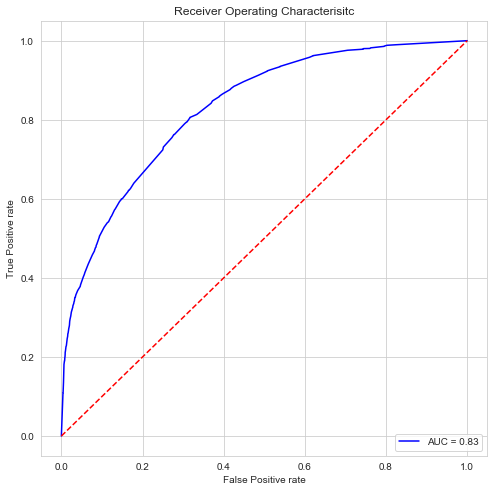

In [256]:
preds = modelDTT.predict_proba(x1Test)[:,1]
fpr, tpr, threshold = roc_curve(y1Test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,8))
plt.grid(True)
plt.title('Receiver Operating Characterisitc')
plt.plot(fpr, tpr, 'b', label='AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()

In [257]:
datax = pd.DataFrame({
    'FPR' : fpr,
    'TPR' : tpr,
    'Threshold' : threshold
})

In [261]:
datax[datax['FPR'] <= 0.01]

,FPR,TPR,Threshold
0,0.000000,0.000000,2.000000
1,0.002108,0.061201,1.000000
2,0.002225,0.064224,0.987952
3,0.002576,0.069135,0.987395
4,0.002576,0.072535,0.986111
5,0.002694,0.076313,0.985294
6,0.002694,0.077824,0.975000
7,0.002694,0.078580,0.973684
8,0.003279,0.103136,0.970740
9,0.003513,0.106913,0.965517


### _New Train Evaluation_

In [321]:
prediction = [1 if item[1] > 0.941176  else 0 for item in modelDTT.predict_proba(x1Train)]
print(classification_report(y1Train,prediction))
print(confusion_matrix(y1Train, prediction))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     76842
           1       0.99      0.13      0.24     23823

    accuracy                           0.79    100665
   macro avg       0.89      0.57      0.56    100665
weighted avg       0.84      0.79      0.73    100665

[[76796    46]
 [20617  3206]]


### _New Test Evaluation_

In [322]:
prediction = [1 if item[1] > 0.941176  else 0 for item in modelDTT.predict_proba(x1Test)]
print(classification_report(y1Test,prediction))
print(confusion_matrix(y1Test, prediction))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      8539
           1       0.89      0.12      0.21      2647

    accuracy                           0.79     11186
   macro avg       0.84      0.56      0.54     11186
weighted avg       0.81      0.79      0.72     11186

[[8499   40]
 [2333  314]]


# _Random Forest Classifier_

### _Selecting Best Estimator For Good Recall Score_

In [273]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
searchRF = GridSearchCV(estimator = RF,
                     param_grid = {
                         'n_estimators' : [100,200,300,500],
                         'min_samples_split' : [2,5,10],
                         'max_depth' : [5,10,20],
                         'class_weight' : [{0:1,1:4},{0:1,1:6},{0:1,1:8},None]
                     }, scoring='recall',
                     cv=2,
                     n_jobs = -1)

In [274]:
searchRF.fit(df1.drop('target', axis=1), df1['target'])

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

### _Model Fitting_

In [281]:
searchRF.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 8},
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [282]:
from sklearn.ensemble import RandomForestClassifier
modelRF = searchRF.best_estimator_
modelRF.fit(x1Train, y1Train)
print('RandomForestClassifier Score =',modelRF.score(x1Train, y1Train))

RandomForestClassifier Score = 0.6157353598569513


### _Train Evaluation_

In [283]:
prediction = modelRF.predict(x1Train)
print(classification_report(y1Train,prediction))
print(confusion_matrix(y1Train, prediction))

              precision    recall  f1-score   support

           0       0.96      0.52      0.67     76842
           1       0.37      0.92      0.53     23823

    accuracy                           0.62    100665
   macro avg       0.67      0.72      0.60    100665
weighted avg       0.82      0.62      0.64    100665

[[39975 36867]
 [ 1815 22008]]


### _Test Evaluation_

In [284]:
prediction = modelRF.predict(x1Test)
print(classification_report(y1Test,prediction))
print(confusion_matrix(y1Test, prediction))

              precision    recall  f1-score   support

           0       0.95      0.51      0.66      8539
           1       0.37      0.92      0.53      2647

    accuracy                           0.61     11186
   macro avg       0.66      0.71      0.59     11186
weighted avg       0.81      0.61      0.63     11186

[[4357 4182]
 [ 216 2431]]


### _ROC AUC_

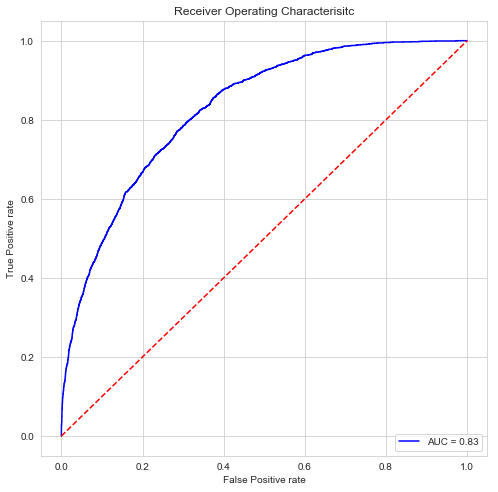

In [285]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
preds = modelRF.predict_proba(x1Test)[:,1]
fpr, tpr, threshold = roc_curve(y1Test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,8))
plt.grid(True)
plt.title('Receiver Operating Characterisitc')
plt.plot(fpr, tpr, 'b', label='AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()

this ROC and AUC curve is indetical with DecisionTree's ROC and AUC curve

In [287]:
datax = pd.DataFrame({
    'FPR' : fpr,
    'TPR' : tpr,
    'Threshold' : threshold
})

In [298]:
datax[datax['TPR'] >= 0.985]

,FPR,TPR,Threshold
3009,0.695046,0.985266,0.438078
3010,0.695280,0.985266,0.438067
3011,0.695280,0.985644,0.438018
3012,0.697037,0.985644,0.437284
3013,0.697037,0.986022,0.437278
...,...,...,...
3122,0.971777,0.999244,0.307812
3123,0.971777,0.999622,0.307801
3124,0.975524,0.999622,0.306265
3125,0.975524,1.000000,0.306224


I decided to choose 0.43008752 as the threshold since it having 0.0.9850579 TPR value

### _New Train Evaluation_

In [301]:
prediction = [1 if item[1] > 0.437278  else 0 for item in modelRF.predict_proba(x1Train)]
print(classification_report(y1Train,prediction))
print(confusion_matrix(y1Train, prediction))

              precision    recall  f1-score   support

           0       0.98      0.31      0.47     76842
           1       0.31      0.98      0.47     23823

    accuracy                           0.47    100665
   macro avg       0.64      0.65      0.47    100665
weighted avg       0.82      0.47      0.47    100665

[[23721 53121]
 [  390 23433]]


### _New Test Evaluation_

In [302]:
prediction = [1 if item[1] > 0.437278  else 0 for item in modelRF.predict_proba(x1Test)]
print(classification_report(y1Test,prediction))
print(confusion_matrix(y1Test, prediction))

              precision    recall  f1-score   support

           0       0.99      0.30      0.46      8539
           1       0.30      0.99      0.47      2647

    accuracy                           0.46     11186
   macro avg       0.65      0.64      0.46     11186
weighted avg       0.82      0.46      0.46     11186

[[2587 5952]
 [  37 2610]]


### _Threshold for Good Precision Score_

In [303]:
datax[datax['FPR'] <= 0.001]

,FPR,TPR,Threshold
0,0.000000,0.000000,1.967381
1,0.000000,0.000378,0.967381
2,0.000000,0.006422,0.961963
3,0.000000,0.007178,0.961940
4,0.000000,0.012089,0.960801
5,0.000000,0.012845,0.960728
6,0.000000,0.017756,0.959773
7,0.000117,0.017756,0.959681
8,0.000117,0.022289,0.958930
9,0.000234,0.022289,0.958884


In [304]:
prediction = [1 if item[1] > 0.956802  else 0 for item in modelRF.predict_proba(x1Train)]
print(classification_report(y1Train,prediction))
print(confusion_matrix(y1Train, prediction))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     76842
           1       0.95      0.04      0.07     23823

    accuracy                           0.77    100665
   macro avg       0.86      0.52      0.47    100665
weighted avg       0.81      0.77      0.68    100665

[[76799    43]
 [22932   891]]


In [305]:
prediction = [1 if item[1] > 0.956802  else 0 for item in modelRF.predict_proba(x1Test)]
print(classification_report(y1Test,prediction))
print(confusion_matrix(y1Test, prediction))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      8539
           1       0.92      0.04      0.07      2647

    accuracy                           0.77     11186
   macro avg       0.85      0.52      0.47     11186
weighted avg       0.81      0.77      0.68     11186

[[8531    8]
 [2549   98]]


### _Selecting Best Estimator For Good Precision Score_

In [275]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
searchRFF = GridSearchCV(estimator = RF,
                     param_grid = {
                         'n_estimators' : [100,200,300,500],
                         'min_samples_split' : [2,5,10],
                         'max_depth' : [5,10,20],
                         'class_weight' : [{0:1,1:4},{0:1,1:6},{0:1,1:8},None]
                     }, scoring='precision',
                     cv=2,
                     n_jobs = -1)

In [276]:
searchRFF.fit(df1.drop('target', axis=1), df1['target'])

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [309]:
searchRFF.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### _Model Fitting_

In [310]:
from sklearn.ensemble import RandomForestClassifier
modelRFF = searchRFF.best_estimator_
modelRFF.fit(x1Train, y1Train)
print('RandomForestClassifier Score =',modelRFF.score(x1Train, y1Train))

RandomForestClassifier Score = 0.8007251775691651


### _Train Evaluation_

In [311]:
prediction = modelRFF.predict(x1Train)
print(classification_report(y1Train,prediction))
print(confusion_matrix(y1Train, prediction))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88     76842
           1       0.81      0.21      0.33     23823

    accuracy                           0.80    100665
   macro avg       0.80      0.60      0.61    100665
weighted avg       0.80      0.80      0.75    100665

[[75653  1189]
 [18871  4952]]


### _Test Evaluation_

In [312]:
prediction = modelRFF.predict(x1Test)
print(classification_report(y1Test,prediction))
print(confusion_matrix(y1Test, prediction))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      8539
           1       0.78      0.20      0.32      2647

    accuracy                           0.80     11186
   macro avg       0.79      0.59      0.60     11186
weighted avg       0.79      0.80      0.75     11186

[[8386  153]
 [2115  532]]


### _ROC AUC_

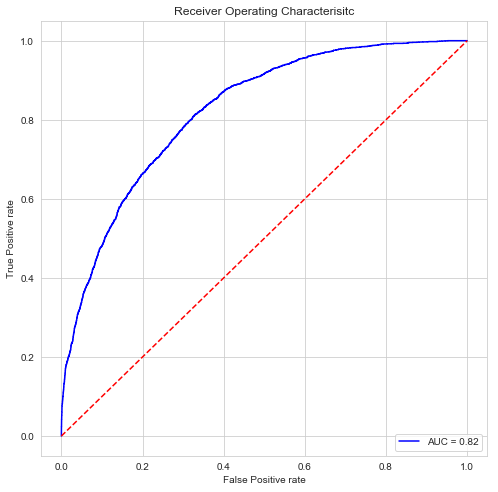

In [313]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
preds = modelRFF.predict_proba(x1Test)[:,1]
fpr, tpr, threshold = roc_curve(y1Test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,8))
plt.grid(True)
plt.title('Receiver Operating Characterisitc')
plt.plot(fpr, tpr, 'b', label='AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()

In [315]:
datax = pd.DataFrame({
    'FPR' : fpr,
    'TPR' : tpr,
    'Threshold' : threshold
})

In [317]:
datax[datax['FPR'] <= 0.001]

,FPR,TPR,Threshold
0,0.000000,0.000000,1.837458
1,0.000000,0.000378,0.837458
2,0.000000,0.015489,0.807235
3,0.000117,0.015489,0.807002
4,0.000117,0.016623,0.806473
5,0.000117,0.017378,0.805498
6,0.000117,0.018134,0.805332
7,0.000117,0.018889,0.805258
8,0.000117,0.021156,0.803669
9,0.000117,0.021912,0.803482


In [319]:
prediction = [1 if item[1] > 0.786745  else 0 for item in modelRFF.predict_proba(x1Train)]
print(classification_report(y1Train,prediction))
print(confusion_matrix(y1Train, prediction))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     76842
           1       0.95      0.05      0.10     23823

    accuracy                           0.78    100665
   macro avg       0.86      0.53      0.49    100665
weighted avg       0.82      0.78      0.69    100665

[[76776    66]
 [22542  1281]]


In [320]:
prediction = [1 if item[1] > 0.786745  else 0 for item in modelRFF.predict_proba(x1Test)]
print(classification_report(y1Test,prediction))
print(confusion_matrix(y1Test, prediction))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      8539
           1       0.95      0.05      0.10      2647

    accuracy                           0.77     11186
   macro avg       0.86      0.53      0.49     11186
weighted avg       0.81      0.77      0.69     11186

[[8531    8]
 [2509  138]]


# _XGBoost_

### _Selecting Best Estimator_

In [279]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
XGB = XGBClassifier()
searchXGB = GridSearchCV(estimator = XGB,
                     param_grid = {
                         'n_estimators' : [50,100,200],
                         'min_samples_split' : [2,5,10],
                         'max_depth' : [5,10,20],
                         'learning_rate' : [0.1, 0.2, 0.3],
                         'class_weight' : [{0:1,1:4},{0:1,1:6},{0:1,1:8},None]
                     }, scoring='recall',
                     cv=2,
                     n_jobs = -1)

In [280]:
searchXGB.fit(df1.drop('target', axis=1), df1['target'])

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_l...1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 4}, {0: 1, 1: 6},
                                          {0: 1, 1: 8}, None],
                         'learning_rate

In [323]:
searchXGB.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', class_weight={0: 1, 1: 4},
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, min_samples_split=2, missing=None,
              n_estimators=200, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

### _Model Fitting_

In [324]:
modelXGB = searchXGB.best_estimator_
modelXGB.fit(x1Train, y1Train)
print('GradientBoostingClassifier Score =',modelXGB.score(x1Train, y1Train))

GradientBoostingClassifier Score = 0.8600705309690557


### _Train Evaluation_

In [325]:
prediction = modelXGB.predict(x1Train)
print(classification_report(y1Train,prediction))
print(confusion_matrix(y1Train, prediction))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     76842
           1       0.82      0.52      0.64     23823

    accuracy                           0.86    100665
   macro avg       0.84      0.74      0.78    100665
weighted avg       0.86      0.86      0.85    100665

[[74143  2699]
 [11387 12436]]


### _Test Evaluation_

In [326]:
prediction = modelXGB.predict(x1Test)
print(classification_report(y1Test,prediction))
print(confusion_matrix(y1Test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      8539
           1       0.72      0.46      0.56      2647

    accuracy                           0.83     11186
   macro avg       0.79      0.70      0.73     11186
weighted avg       0.82      0.83      0.82     11186

[[8066  473]
 [1422 1225]]


### _ROC AUC_

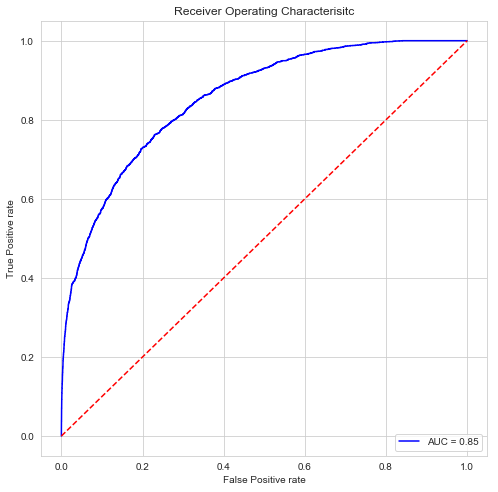

In [328]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
preds = modelXGB.predict_proba(x1Test)[:,1]
fpr, tpr, threshold = roc_curve(y1Test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,8))
plt.grid(True)
plt.title('Receiver Operating Characterisitc')
plt.plot(fpr, tpr, 'b', label='AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()

In [329]:
datax = pd.DataFrame({
    'FPR' : fpr,
    'TPR' : tpr,
    'Threshold' : threshold
})

In [331]:
datax[datax['TPR'] >= 0.985]

,FPR,TPR,Threshold
2728,0.696452,0.985266,0.047594
2729,0.697974,0.985266,0.047291
2730,0.697974,0.985644,0.047209
2731,0.699965,0.985644,0.046807
2732,0.699965,0.986022,0.046800
...,...,...,...
2847,0.840262,0.999622,0.007505
2848,0.840262,1.000000,0.007482
2849,0.842136,1.000000,0.006750
2850,0.842370,1.000000,0.006711


### _New Train Evaluation_

In [332]:
prediction = [1 if item[1] > 0.046800  else 0 for item in modelXGB.predict_proba(x1Train)]
print(classification_report(y1Train,prediction))
print(confusion_matrix(y1Train, prediction))

              precision    recall  f1-score   support

           0       0.99      0.31      0.48     76842
           1       0.31      0.99      0.47     23823

    accuracy                           0.47    100665
   macro avg       0.65      0.65      0.47    100665
weighted avg       0.83      0.47      0.47    100665

[[24013 52829]
 [  172 23651]]


### _New Test Evaluation_

In [333]:
prediction = [1 if item[1] > 0.046800  else 0 for item in modelXGB.predict_proba(x1Test)]
print(classification_report(y1Test,prediction))
print(confusion_matrix(y1Test, prediction))

              precision    recall  f1-score   support

           0       0.99      0.30      0.46      8539
           1       0.30      0.99      0.46      2647

    accuracy                           0.46     11186
   macro avg       0.64      0.64      0.46     11186
weighted avg       0.82      0.46      0.46     11186

[[2562 5977]
 [  37 2610]]


### _Threshold For Good Precision Score_

In [335]:
datax[datax['FPR'] <= 0.001]

,FPR,TPR,Threshold
0,0.000000,0.000000,1.996535
1,0.000000,0.000378,0.996535
2,0.000000,0.004911,0.986199
3,0.000000,0.005667,0.985701
4,0.000000,0.009445,0.979870
5,0.000000,0.010578,0.979358
6,0.000000,0.011334,0.978673
7,0.000117,0.011334,0.978629
8,0.000117,0.024934,0.967442
9,0.000117,0.025689,0.967258


### _New Train Evaluation_

In [336]:
prediction = [1 if item[1] > 0.916973  else 0 for item in modelXGB.predict_proba(x1Train)]
print(classification_report(y1Train,prediction))
print(confusion_matrix(y1Train, prediction))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     76842
           1       0.99      0.10      0.19     23823

    accuracy                           0.79    100665
   macro avg       0.89      0.55      0.53    100665
weighted avg       0.83      0.79      0.71    100665

[[76818    24]
 [21341  2482]]


### _New Test Evaluation_

In [337]:
prediction = [1 if item[1] > 0.916973  else 0 for item in modelXGB.predict_proba(x1Test)]
print(classification_report(y1Test,prediction))
print(confusion_matrix(y1Test, prediction))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      8539
           1       0.97      0.09      0.17      2647

    accuracy                           0.78     11186
   macro avg       0.87      0.55      0.52     11186
weighted avg       0.82      0.78      0.71     11186

[[8531    8]
 [2400  247]]


### _Selecting Best Estimator For Good Precision Score_

In [277]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
XGB = XGBClassifier()
searchXGBB = GridSearchCV(estimator = XGB,
                     param_grid = {
                         'n_estimators' : [50,100,200],
                         'min_samples_split' : [2,5,10],
                         'max_depth' : [5,10,20],
                         'learning_rate' : [0.1, 0.2, 0.3],
                         'class_weight' : [{0:1,1:4},{0:1,1:6},{0:1,1:8},None]
                     }, scoring='precision',
                     cv=2,
                     n_jobs = -1)

In [278]:
searchXGBB.fit(df1.drop('target', axis=1), df1['target'])

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_l...
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 4}, {0: 1, 1: 6},
                                          {0: 1, 1: 8}, None],
                         'learning_rate':

### _Model Fitting_

In [339]:
modelXGBB = searchXGBB.best_estimator_
modelXGBB.fit(x1Train, y1Train)
print('GradientBoostingClassifier Score =',modelXGBB.score(x1Train, y1Train))

GradientBoostingClassifier Score = 0.8311528336561863


### _Train Evaluation_

In [340]:
prediction = modelXGBB.predict(x1Train)
print(classification_report(y1Train,prediction))
print(confusion_matrix(y1Train, prediction))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90     76842
           1       0.76      0.41      0.54     23823

    accuracy                           0.83    100665
   macro avg       0.80      0.69      0.72    100665
weighted avg       0.82      0.83      0.81    100665

[[73790  3052]
 [13945  9878]]


### _Test Evaluation_

In [341]:
prediction = modelXGBB.predict(x1Test)
print(classification_report(y1Test,prediction))
print(confusion_matrix(y1Test, prediction))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      8539
           1       0.73      0.41      0.53      2647

    accuracy                           0.82     11186
   macro avg       0.78      0.68      0.71     11186
weighted avg       0.81      0.82      0.81     11186

[[8128  411]
 [1558 1089]]


### _ROC AUC_

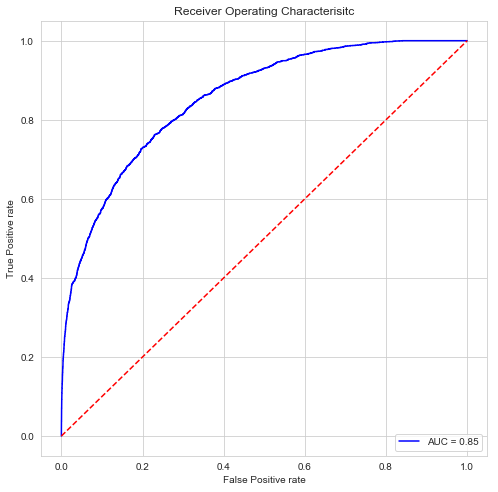

In [342]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
preds = modelXGB.predict_proba(x1Test)[:,1]
fpr, tpr, threshold = roc_curve(y1Test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,8))
plt.grid(True)
plt.title('Receiver Operating Characterisitc')
plt.plot(fpr, tpr, 'b', label='AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()

In [343]:
datax = pd.DataFrame({
    'FPR' : fpr,
    'TPR' : tpr,
    'Threshold' : threshold
})

In [345]:
datax[datax['FPR'] <= 0.001]

,FPR,TPR,Threshold
0,0.000000,0.000000,1.996535
1,0.000000,0.000378,0.996535
2,0.000000,0.004911,0.986199
3,0.000000,0.005667,0.985701
4,0.000000,0.009445,0.979870
5,0.000000,0.010578,0.979358
6,0.000000,0.011334,0.978673
7,0.000117,0.011334,0.978629
8,0.000117,0.024934,0.967442
9,0.000117,0.025689,0.967258


### _New Train Evaluation_

In [346]:
prediction = [1 if item[1] > 0.916973  else 0 for item in modelXGBB.predict_proba(x1Train)]
print(classification_report(y1Train,prediction))
print(confusion_matrix(y1Train, prediction))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     76842
           1       0.98      0.03      0.06     23823

    accuracy                           0.77    100665
   macro avg       0.87      0.52      0.47    100665
weighted avg       0.82      0.77      0.68    100665

[[76824    18]
 [23030   793]]


### _New Test Evaluation_

In [347]:
prediction = [1 if item[1] > 0.916973  else 0 for item in modelXGBB.predict_proba(x1Test)]
print(classification_report(y1Test,prediction))
print(confusion_matrix(y1Test, prediction))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      8539
           1       0.97      0.03      0.07      2647

    accuracy                           0.77     11186
   macro avg       0.87      0.52      0.47     11186
weighted avg       0.82      0.77      0.68     11186

[[8536    3]
 [2555   92]]


# _2nd and 3rd Data Frame_

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler2 = MinMaxScaler()
scaler3 = StandardScaler()
scaler2.fit(df1.drop('target', axis=1))
scaler3.fit(df1.drop('target', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [21]:
df2 = pd.DataFrame(scaler2.transform(df1.drop('target', axis=1)), columns=df1.drop('target', axis=1).columns)
df2['target'] = df1['target']
df3 = pd.DataFrame(scaler3.transform(df1.drop('target', axis=1)), columns=df1.drop('target', axis=1).columns)
df3['target'] = df1['target']

In [22]:
df2 = df2.dropna()
df3 = df3.dropna()

### _Splitting_

In [23]:
from sklearn.model_selection import train_test_split
x2Train, x2Test, y2Train, y2Test = train_test_split(
    df2.drop('target', axis=1), df2['target'],
    test_size = .1
)
x3Train, x3Test, y3Train, y3Test = train_test_split(
    df3.drop('target', axis=1), df3['target'],
    test_size = .1
)

# _KNeighbors Classifier_

### _Oversampling_

In [52]:
from imblearn.over_sampling import SMOTE
over = SMOTE()
x2TrainOver, y2TrainOver = over.fit_sample(x2Train, y2Train)
x3TrainOver, y3TrainOver = over.fit_sample(x3Train, y3Train)

### _Selecting Best Estimator_

In [53]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

for i in range(1,20):
    
    modelKNN = KNeighborsClassifier(n_neighbors=i, weights='distance')
    modelKNN.fit(x2TrainOver,y2TrainOver)
    preds = modelKNN.predict(x2Test)
    error_rate.append(np.mean(np.array(preds) != np.array(y2Test)))

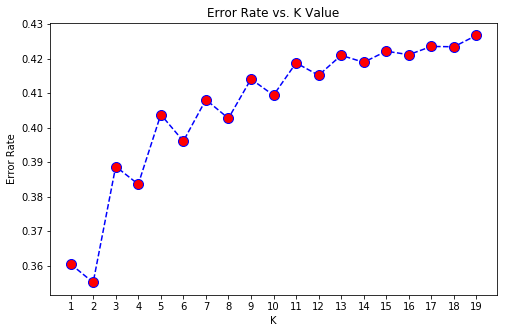

In [54]:
plt.figure(figsize=(8,5))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.xticks(np.arange(1,20), np.arange(1,20))
plt.show()

I decided to choose n_neighbors=2 because it has the lowest error rate. but even it is the lowest, the error rate score is around 0.35 and we are gonna get around 0.65 for accuracy score for data test prediction

### _Model Fitting_

In [55]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN2 = KNeighborsClassifier(n_neighbors=2, weights='distance')
modelKNN2.fit(x2TrainOver, y2TrainOver)
print('KNeighborsClassifier Score =',modelKNN2.score(x2TrainOver, y2TrainOver))

KNeighborsClassifier Score = 0.982417655687425


In [56]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN3 = KNeighborsClassifier(n_neighbors=2, weights='distance')
modelKNN3.fit(x3TrainOver, y3TrainOver)
print('KNeighborsClassifier Score =',modelKNN3.score(x3TrainOver, y3TrainOver))

KNeighborsClassifier Score = 0.9817753830970513


### _Train Evaluation_

In [57]:
prediction = modelKNN2.predict(x2TrainOver)
print(classification_report(y2TrainOver,prediction))
print(confusion_matrix(y2TrainOver, prediction))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     74990
         1.0       1.00      0.97      0.98     74990

    accuracy                           0.98    149980
   macro avg       0.98      0.98      0.98    149980
weighted avg       0.98      0.98      0.98    149980

[[74788   202]
 [ 2435 72555]]


In [58]:
prediction = modelKNN3.predict(x3TrainOver)
print(classification_report(y3TrainOver,prediction))
print(confusion_matrix(y3TrainOver, prediction))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     74981
         1.0       1.00      0.97      0.98     74981

    accuracy                           0.98    149962
   macro avg       0.98      0.98      0.98    149962
weighted avg       0.98      0.98      0.98    149962

[[74825   156]
 [ 2577 72404]]


### _Test Evaluation_

In [59]:
prediction = modelKNN2.predict(x2Test)
print(classification_report(y2Test,prediction))
print(confusion_matrix(y2Test, prediction))

              precision    recall  f1-score   support

         0.0       0.78      0.74      0.76      8314
         1.0       0.29      0.35      0.32      2580

    accuracy                           0.64     10894
   macro avg       0.54      0.54      0.54     10894
weighted avg       0.67      0.64      0.66     10894

[[6129 2185]
 [1684  896]]


In [60]:
prediction = modelKNN3.predict(x3Test)
print(classification_report(y3Test,prediction))
print(confusion_matrix(y3Test, prediction))

              precision    recall  f1-score   support

         0.0       0.78      0.72      0.75      8323
         1.0       0.27      0.33      0.30      2571

    accuracy                           0.63     10894
   macro avg       0.52      0.53      0.52     10894
weighted avg       0.66      0.63      0.64     10894

[[6034 2289]
 [1721  850]]


It seem that our model is overfitting since the test score drop significantly compared to train score

### _ROC AUC_

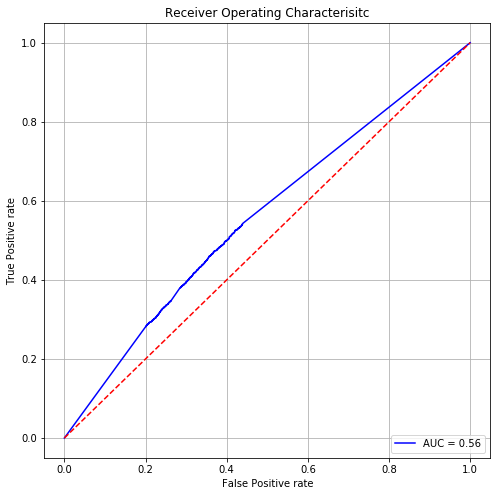

In [61]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
preds = modelKNN2.predict_proba(x2Test)[:,1]
fpr, tpr, threshold = roc_curve(y2Test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,8))
plt.grid(True)
plt.title('Receiver Operating Characterisitc')
plt.plot(fpr, tpr, 'b', label='AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()

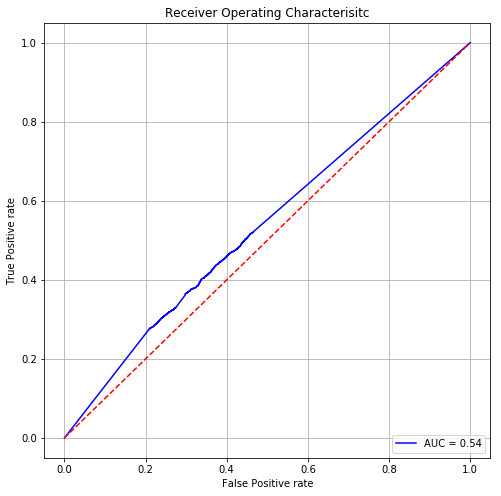

In [62]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
preds = modelKNN3.predict_proba(x3Test)[:,1]
fpr, tpr, threshold = roc_curve(y3Test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,8))
plt.grid(True)
plt.title('Receiver Operating Characterisitc')
plt.plot(fpr, tpr, 'b', label='AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()

Since this ROC and AUC curve worse than RandomForest so I decided not to change the threshold and not doing further evaluation

# _Support Vector Machine_

In [24]:
from sklearn.svm import SVC
modelSVM2 = SVC(gamma="auto", decision_function_shape='ovo', probability=True)
modelSVM2.fit(x2Train, y2Train)
print('SVC Score =',modelSVM2.score(x2Train, y2Train))

SVC Score = 0.7643464778963259


### _Train Evaluation_

In [25]:
prediction = modelSVM2.predict(x2Train)
print(classification_report(y2Train,prediction))
print(confusion_matrix(y2Train, prediction))

c:\users\m. khakim hidayad\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       0.76      1.00      0.87     74935
         1.0       0.00      0.00      0.00     23103

    accuracy                           0.76     98038
   macro avg       0.38      0.50      0.43     98038
weighted avg       0.58      0.76      0.66     98038

[[74935     0]
 [23103     0]]


### _Test Evaluation_

In [26]:
prediction = modelSVM2.predict(x2Test)
print(classification_report(y2Test,prediction))
print(confusion_matrix(y2Test, prediction))

              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87      8369
         1.0       0.00      0.00      0.00      2525

    accuracy                           0.77     10894
   macro avg       0.38      0.50      0.43     10894
weighted avg       0.59      0.77      0.67     10894

[[8369    0]
 [2525    0]]


c:\users\m. khakim hidayad\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### _ROC AUC_

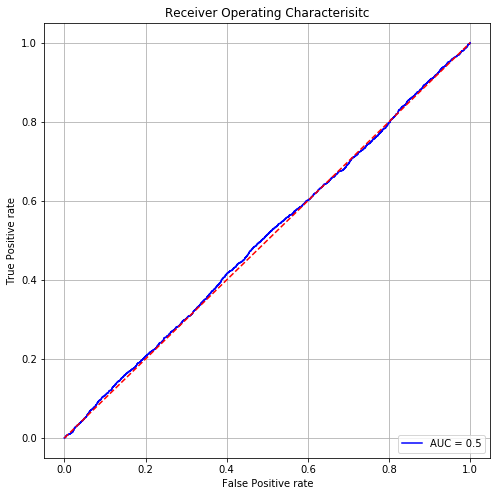

In [27]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
preds = modelSVM2.predict_proba(x2Test)[:,1]
fpr, tpr, threshold = roc_curve(y2Test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,8))
plt.grid(True)
plt.title('Receiver Operating Characterisitc')
plt.plot(fpr, tpr, 'b', label='AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()

# _4th Data Frame_

### _Binary Encoder_

In [71]:
import category_encoders as ce

df4 = df1
encoder = ce.BinaryEncoder(cols=['productx'])
df4 = encoder.fit_transform(df4)

### _Splitting_

In [75]:
from sklearn.model_selection import train_test_split
x4Train, x4Test, y4Train, y4Test = train_test_split(
    df4.drop('target', axis=1), df4['target'],
    test_size = .1
)

# _Logistic Regression_

### _Model Fitting_

In [77]:
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression(solver='lbfgs',max_iter=100000)
modelLR.fit(x4Train,y4Train)
print('LogisticRegression Score =',modelLR.score(x4Train, y4Train))

LogisticRegression Score = 0.8066756072120399


### _Train Evaluation_

In [79]:
prediction = modelLR.predict(x4Train)
print(classification_report(y4Train,prediction))
print(confusion_matrix(y4Train, prediction))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88     76848
           1       0.72      0.30      0.42     23817

    accuracy                           0.81    100665
   macro avg       0.77      0.63      0.65    100665
weighted avg       0.79      0.81      0.77    100665

[[74113  2735]
 [16726  7091]]


### _Test Evaluation_

In [80]:
prediction = modelLR.predict(x4Test)
print(classification_report(y4Test,prediction))
print(confusion_matrix(y4Test, prediction))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      8533
           1       0.72      0.29      0.41      2653

    accuracy                           0.80     11186
   macro avg       0.77      0.63      0.65     11186
weighted avg       0.79      0.80      0.77     11186

[[8235  298]
 [1894  759]]


### _ROC AUC_

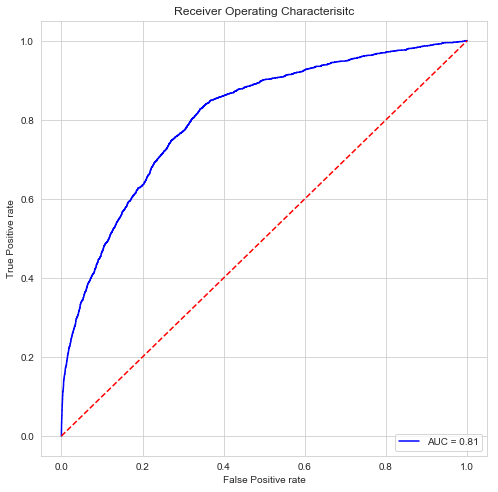

In [81]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
preds = modelLR.predict_proba(x4Test)[:,1]
fpr, tpr, threshold = roc_curve(y4Test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,8))
plt.grid(True)
plt.title('Receiver Operating Characterisitc')
plt.plot(fpr, tpr, 'b', label='AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()

# _Summary_

* 1st XGBoost Model with 0.046800 threshold is model which have the best recall score (0.99 recall score, 0.30 precision score)
* 1st XGBoost Model with 0.916973 threshold is model which have the best precision score (0.97 recall score, 0.09 precision score)

# _Further Evaluation For Selected Model_

### _Consistency Evaluation Using KFold_

In [348]:
from sklearn.metrics import roc_curve, recall_score, precision_score, auc, log_loss, roc_auc_score, f1_score
def calculation_error(X, Y, model, threshold):
    prediction = [1 if item[1] > threshold  else 0 for item in model.predict_proba(X)]
    predictProba = model.predict_proba(X)
    precision = precision_score(Y, prediction)
    recall = recall_score(Y, prediction)
    f1 = f1_score(Y, prediction, average='macro')
    roc_auc = roc_auc_score(Y, predictProba[:,1])
    logloss = log_loss(Y, predictProba)
    report = classification_report(Y, prediction)
    return {
        "report" : report,
        "f1" : f1,
        "roc" : roc_auc,
        "precision" : precision,
        "recall" : recall,
        "logloss" : logloss
    }

def calculation_metrics(xTrain, yTrain, xTest, yTest, model, threshold):
    model.fit(xTrain, yTrain)
    train_error = calculation_error(xTrain, yTrain, model, threshold)
    validation_error = calculation_error(xTest, yTest, model, threshold)
    return train_error, validation_error

### _Good Recall Score_

In [349]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)
data = df1.drop('target', axis=1)
target = df1['target']
train_error = []
validation_error = []
for trainIndex, valIndex in kf.split(data, target):
    xTrain, xVal = data.iloc[trainIndex], data.iloc[valIndex]
    yTrain, yVal = target.iloc[trainIndex], target.iloc[valIndex]
    
    trainError, valError = calculation_metrics(xTrain, yTrain, xVal, yVal, modelXGB, 0.046800)
    
    train_error.append(trainError)
    validation_error.append(valError)

In [350]:
dfKFold = pd.DataFrame({
    "Train Precision" : [item['precision'] for item in train_error],
    "Train Recall" : [item['recall'] for item in train_error],
    "Train ROC AUC" : [item['roc'] for item in train_error],
    "Train F1 Score" : [item['f1'] for item in train_error],
    "Train Log Loss" : [item['logloss'] for item in train_error],
    "Test Precision" : [item['precision'] for item in validation_error],
    "Test Recall" : [item['recall'] for item in validation_error],
    "Test ROC AUC" : [item['roc'] for item in validation_error],
    "Test F1 Sccore" : [item['f1'] for item in validation_error],
    "Test Log Loss" : [item['logloss'] for item in validation_error]
})
additional = []
for item in dfKFold:
    additional.append(dfKFold[item].mean())
dfKFold = pd.concat([dfKFold,pd.DataFrame(
    [additional],
    index=['Average'], columns=dfKFold.columns
)])
dfKFold

,Train Precision,Train Recall,Train ROC AUC,Train F1 Score,Train Log Loss,Test Precision,Test Recall,Test ROC AUC,Test F1 Sccore,Test Log Loss
0,0.309413,0.992742,0.895048,0.473624,0.328430,0.306120,0.983675,0.862305,0.471092,0.365015
1,0.308378,0.992998,0.893761,0.470655,0.329804,0.301902,0.988159,0.858842,0.462405,0.368473
2,0.308022,0.992379,0.893911,0.472236,0.329158,0.313593,0.988607,0.862626,0.470754,0.370852
3,0.307125,0.993107,0.893174,0.468827,0.330060,0.310642,0.983564,0.864874,0.473666,0.366461
4,0.310587,0.992303,0.893768,0.475088,0.330815,0.297712,0.984399,0.863126,0.464016,0.359608
5,0.308727,0.993343,0.893045,0.470685,0.330927,0.298651,0.984913,0.862392,0.461934,0.363156
6,0.307907,0.992944,0.894860,0.470437,0.328214,0.307558,0.989850,0.866546,0.467585,0.361462
7,0.310991,0.992258,0.895368,0.479061,0.327074,0.310698,0.977054,0.857626,0.470808,0.376156
8,0.309797,0.992492,0.894057,0.474529,0.329559,0.302952,0.979840,0.851685,0.465343,0.375673
9,0.309514,0.992476,0.893663,0.474958,0.329814,0.308649,0.981343,0.859911,0.468841,0.371167


### _Good Precision Score_

In [351]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)
data = df1.drop('target', axis=1)
target = df1['target']
train_error = []
validation_error = []
for trainIndex, valIndex in kf.split(data, target):
    xTrain, xVal = data.iloc[trainIndex], data.iloc[valIndex]
    yTrain, yVal = target.iloc[trainIndex], target.iloc[valIndex]
    
    trainError, valError = calculation_metrics(xTrain, yTrain, xVal, yVal, modelXGB, 0.916973)
    
    train_error.append(trainError)
    validation_error.append(valError)

In [352]:
dfKFold = pd.DataFrame({
    "Train Precision" : [item['precision'] for item in train_error],
    "Train Recall" : [item['recall'] for item in train_error],
    "Train ROC AUC" : [item['roc'] for item in train_error],
    "Train F1 Score" : [item['f1'] for item in train_error],
    "Train Log Loss" : [item['logloss'] for item in train_error],
    "Test Precision" : [item['precision'] for item in validation_error],
    "Test Recall" : [item['recall'] for item in validation_error],
    "Test ROC AUC" : [item['roc'] for item in validation_error],
    "Test F1 Sccore" : [item['f1'] for item in validation_error],
    "Test Log Loss" : [item['logloss'] for item in validation_error]
})
additional = []
for item in dfKFold:
    additional.append(dfKFold[item].mean())
dfKFold = pd.concat([dfKFold,pd.DataFrame(
    [additional],
    index=['Average'], columns=dfKFold.columns
)])
dfKFold

,Train Precision,Train Recall,Train ROC AUC,Train F1 Score,Train Log Loss,Test Precision,Test Recall,Test ROC AUC,Test F1 Sccore,Test Log Loss
0,0.994224,0.101108,0.895048,0.530542,0.328430,0.963265,0.089598,0.862305,0.520233,0.365015
1,0.993868,0.101920,0.893761,0.531207,0.329804,0.960870,0.084416,0.858842,0.515976,0.368473
2,0.991959,0.098699,0.893911,0.528633,0.329158,0.954023,0.091510,0.862626,0.519441,0.370852
3,0.992060,0.105031,0.893174,0.534085,0.330060,0.974910,0.101606,0.864874,0.529896,0.366461
4,0.993033,0.101355,0.893768,0.530535,0.330815,0.968000,0.094384,0.863126,0.526426,0.359608
5,0.993574,0.103580,0.893045,0.532566,0.330927,0.937008,0.092070,0.862392,0.523339,0.363156
6,0.992587,0.106846,0.894860,0.535634,0.328214,0.967509,0.100752,0.866546,0.529473,0.361462
7,0.992881,0.111494,0.895368,0.539811,0.327074,0.962406,0.094745,0.857626,0.522961,0.376156
8,0.990778,0.103645,0.894057,0.532706,0.329559,0.961240,0.094332,0.851685,0.524541,0.375673
9,0.991235,0.104582,0.893663,0.533686,0.329814,0.949091,0.097388,0.859911,0.525667,0.371167


# _Business Solution_

we are gonna give 2 kinds promo which is free shipping and 20% off for their next purchase and free shipping only. this type of are flexible base on company budget and depper analysis for the customer transaction

In [426]:
df = pd.read_csv('ModifiedData.csv')

In [427]:
x1Test.index

Int64Index([ 99145,  56731,  91179,   8193,  68736,  79852,  51355,  60567,
             71408,  52425,
            ...
             70105,  35458,  93406,  81432, 101345,  35531,  99333,  57006,
            104255,  59493],
           dtype='int64', length=11186)

In [444]:
dff = df.loc[x1Test.index]

In [445]:
dff = dff[['freight_rate','repurchase','product_price','quantity']]
dff['target'] = y1Test
dff['predict'] = [2 if item[1] >= 0.916973  else ( 1 if item[1] < 0.916973 and item[1] >= 0.046800 else 0 ) for item in modelXGB.predict_proba(x1Test)]
dff

,freight_rate,repurchase,product_price,quantity,target,predict
99145,21.10,0,99.90,1,0,1
56731,23.13,0,109.90,1,0,0
91179,38.55,0,143.00,1,1,1
8193,13.55,0,22.90,1,0,1
68736,19.32,0,29.86,1,0,0
...,...,...,...,...,...,...
35531,14.46,0,52.90,1,0,1
99333,69.64,0,109.00,1,1,1
57006,12.49,0,69.90,1,1,1
104255,8.54,0,54.00,1,0,1


* predict valued 2 is the customer who are going to get 1st promo (free shipping and 20% off for their next purchase)
* predict valued 1 is the customer who are going to get 2nd promo (free shipping only)
* predict valued 0 is the customer who are not get our promo

In [433]:
dff[dff['predict'] == 2]['target'].value_counts()

1    273
0      3
Name: target, dtype: int64

In [372]:
dff[dff['predict'] == 1]['target'].value_counts()

0    5889
1    2352
Name: target, dtype: int64

In [434]:
dff[dff['predict'] == 0]['target'].value_counts()

0    2647
1      22
Name: target, dtype: int64

In [435]:
dff['target'].value_counts()

0    8539
1    2647
Name: target, dtype: int64

Note :
* there are 3 customer who actually satisfied but get our 1st promo
* there are 5889 customer who actually satisfied but get our 2nd promo
* there are 2647 customer who actually satisfied and not get our promo
* and the most important things is just 22 from 2352 who actually are not satisfied didn't get our promo

In [460]:
dff['purchase_value'] = dff['product_price'] * dff['quantity']
dff

,freight_rate,repurchase,product_price,quantity,target,predict,purchase_value
99145,21.10,0,99.90,1,0,1,99.90
56731,23.13,0,109.90,1,0,0,109.90
91179,38.55,0,143.00,1,1,1,143.00
8193,13.55,0,22.90,1,0,1,22.90
68736,19.32,0,29.86,1,0,0,29.86
...,...,...,...,...,...,...,...
35531,14.46,0,52.90,1,0,1,52.90
99333,69.64,0,109.00,1,1,1,109.00
57006,12.49,0,69.90,1,1,1,69.90
104255,8.54,0,54.00,1,0,1,54.00


### _Cost_

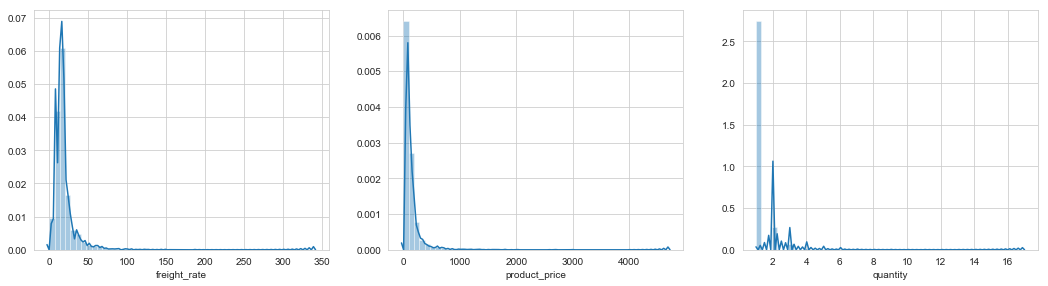

In [361]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
fig = plt.figure(figsize = (18,15))
for i, item in enumerate (df[['freight_rate','product_price','quantity']]):
    plt.subplot(3,3,i+1)
    sns.distplot(df[item])

In [362]:
df[['freight_rate','product_price','quantity']].describe()

,freight_rate,product_price,quantity
count,11186.000000,11186.000000,11186.000000
mean,18.570085,121.187550,1.198194
std,15.288817,183.361304,0.717095
min,0.000000,1.200000,1.000000
25%,11.850000,39.990000,1.000000
50%,15.560000,74.990000,1.000000
75%,19.977500,135.275000,1.000000
max,338.300000,4690.000000,17.000000


Since our data skew to the right, we are gonna take median to be the average cost for each transaction.<br>
* free shipping will cost 15.5
* 20% off will cost 15

# _Forecasting With Some Asumption_

In [436]:
df['order_purchase_timestamp'] = df['order_purchase_timestamp'].apply(
    lambda row : row[:10]
)
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

In [437]:
data1 = df[['order_purchase_timestamp','quantity','product_price','repurchase']]
data1['sales_revenue'] = data1['product_price'] * data1['quantity']
data1 = data1.set_index('order_purchase_timestamp')
data1 = data1.sort_index()
data1.head()

c:\users\m. khakim hidayad\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,quantity,product_price,repurchase,sales_revenue
order_purchase_timestamp,,,,
2016-10-03,1,21.90,0,21.90
2016-10-03,1,128.90,0,128.90
2016-10-03,1,74.90,0,74.90
2016-10-03,1,36.49,0,36.49
2016-10-03,1,119.90,0,119.90


In [438]:
data4 = data1[['quantity','repurchase']].groupby([data1.index,'repurchase'])
data4 = data4[['quantity']].describe()
data4 = data4.unstack()
data4['new_customer'] = data4['quantity']['count'][0] * data4['quantity']['mean'][0]
data4['existing_customer'] = data4['quantity']['count'][1] * data4['quantity']['mean'][1]
data4.head()

quantity                                          \
                            count           mean            std       min   
repurchase                      0    1         0    1         0    1    0   
order_purchase_timestamp                                                    
2016-10-03                    6.0  1.0  1.000000  1.0  0.000000  NaN  1.0   
2016-10-04                   68.0  1.0  1.176471  1.0  0.516624  NaN  1.0   
2016-10-05                   48.0  3.0  1.666667  1.0  1.293738  0.0  1.0   
2016-10-06                   46.0  1.0  1.130435  1.0  0.340503  NaN  1.0   
2016-10-07                   44.0  1.0  1.181818  1.0  0.495220  NaN  1.0   

                                                                       \
                               25%       50%       75%       max        
repurchase                  1    0    1    0    1    0    1    0    1   
order_purchase_timestamp                                                
2016-10-03                1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
2016-10-04                1.0  1.0  1.0  1.0  1.0  1.0  1.0  4.0  1.0   
2016-10-05                1.0  1.0  1.0  1.0  1.0  2.0  1.0  6.0  1.0   
2016-10-06                1.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  1.0   
2016-10-07                1.0  1.0  1.0  1.0  1.0  1.0  1.0  3.0  1.0   

                         new_customer existing_customer  
                                                         
repurchase                                               
order_purchase_timestamp                                 
2016-10-03                        6.0               1.0  
2016-10-04                       80.0               1.0  
2016-10-05                       80.0               3.0  
2016-10-06                       52.0               1.0  
2016-10-07                       52.0               1.0

### _Average Increase Transaction for New Customer_

In [481]:
QuarterlyTransaction1 = [data4['2017-01' : '2017-03']['new_customer'].sum(), data4['2017-04' : '2017-06']['new_customer'].sum(),  data4['2017-10' : '2017-12']['new_customer'].sum(), data4['2018-01' : '2018-03']['new_customer'].sum(), data4['2018-04' : '2018-06']['new_customer'].sum()]
QuarterlyTransaction1

[6753.0, 11362.0, 23581.0, 27866.0, 27337.0]

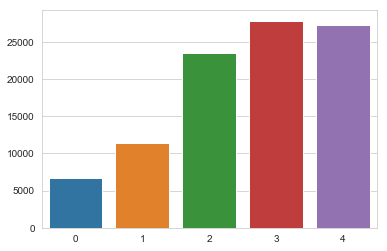

In [483]:
sns.barplot(x=np.arange(5), y=QuarterlyTransaction1)

In [484]:
AvgNewCustomer = np.mean([(item1-item2)/item2 for item1, item2 in zip(QuarterlyTransaction1[1:], QuarterlyTransaction1)])
AvgNewCustomer

0.4801671804895814

the number of transaction made by new customer increase 48.8 % in average for the next quarter

### _Average Existing Customer Who Made Repurchase_

In [489]:
df[df['repurchase'] == 0]['customer_unique_id'].nunique()

91609

In [490]:
df[df['repurchase'] == 1]['customer_unique_id'].nunique()

2721

In [496]:
print('the average existing customer who made repurchase is =', round((df[df['repurchase'] == 1]['customer_unique_id'].nunique()/df[df['repurchase'] == 0]['customer_unique_id'].nunique())*100,2), '%')

the average existing customer who made repurchase is = 2.97 %


### _Forecasting Transactions (Without Model)_

In [451]:
dff['repurchase'].value_counts()

0    10785
1      401
Name: repurchase, dtype: int64

in our data there are 10785 new customer and 401 existing customer. based on average increase for both type of customer, the number of transactions for the next should be :

In [500]:
print('new customer for the next quarter = ', round(dff['repurchase'].value_counts()[0] * 1.48))
print('existing customer for the next quarter = ', round(dff['repurchase'].value_counts().sum() * 0.029), '(without using our model)')
print('total customer for the next quarter = ', round(dff['repurchase'].value_counts()[0] * 1.48) + round(dff['repurchase'].value_counts().sum() * 0.029))

new customer for the next quarter =  15962.0
existing customer for the next quarter =  324.0 (without using our model)
total customer for the next quarter =  16286.0


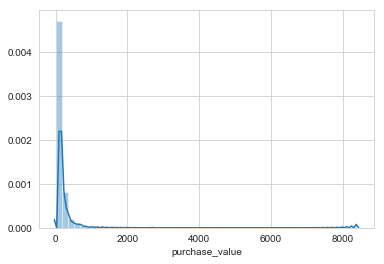

In [463]:
sns.distplot(dff['purchase_value'])

In [464]:
dff['purchase_value'].describe()

count    11186.000000
mean       137.455835
std        216.428029
min          3.850000
25%         45.000000
50%         84.865000
75%        149.970000
max       8400.000000
Name: purchase_value, dtype: float64

Let's make an asumption :
* the purchase value of every cutsomer will be different, but let's make asumption that the purchase value of our customer is 84 since it is the median in our data. then our sales revenue for the next quarter (without using our model) is :

In [502]:
print('sales revenue this quarter = ', dff['repurchase'].value_counts().sum()*84)
print('sales revenue for the next quarter = ', 16286*84)
print('our sales revenue increase = ', round(((16286*84)-(dff['repurchase'].value_counts().sum()*84))/(dff['repurchase'].value_counts().sum()*84)*100,2), '%')

sales revenue this quarter =  939624
sales revenue for the next quarter =  1368024
our sales revenue increase =  45.59 %


### _Forecasting Transactions (Using Model)_

In [513]:
dff['predict'].value_counts().sort_index()

0    2669
1    8241
2     276
Name: predict, dtype: int64

the number of transaction made by new customer will be the same with previous forecasting, which is 15962.

Let's make an asumption :
* without our model and promo, the number of existing customer who made repurchase just 2.97%. let's say we already doing well to give them the right treatment and customer who get our 2nd promo (free shiping only) 20% of them made repurchase and customer who get our 1st promo (free shiping and 20% off) 40% of them made repurchase. then the our sales revenue for the next quarter will be :

In [84]:
print('the existing customer who made repurchase = ',(8241 * 0.2) + (276 * 0.3))

the existing customer who made repurchase =  1731.0


In [85]:
print('the number of customer transaction for the next month =', (15962+1731))

the number of customer transaction for the next month = 17693


In [86]:
print('sales revenue this quarter = ', 11186*84)
print('sales revenue for the next quarter = ', 17693*84)
print('our sales revenue increase = ', round(((17693*84)-(11186*84))/(11186*84)*100,2), '%')

sales revenue this quarter =  939624
sales revenue for the next quarter =  1486212
our sales revenue increase =  58.17 %


In [88]:
print('our cost for free shiping only promo =', round((8241 * 0.2)*15.5, 2))
print('our cost for 20% off + free shiping promo =', round((276 * 0.3)*30.5, 2))
print('total cost =', (25547.1+2525.4))

our cost for free shiping only promo = 25547.1
our cost for 20% off + free shiping promo = 2525.4
total cost = 28072.5


In [89]:
print('sales revenue - cost =', (1486212-28072.5))

sales revenue - cost = 1458139.5


In [90]:
print('sales revenue this quarter = ', 11186*84)
print('sales revenue for the next quarter = ', 1458139.5)
print('our sales revenue increase = ', round(((1458139.5)-(11186*84))/(11186*84)*100,2), '%')

sales revenue this quarter =  939624
sales revenue for the next quarter =  1458139.5
our sales revenue increase =  55.18 %


2nd asumption :
* The customer who get our 2nd promo (free shiping only) 40% of them made repurchase and customer who get our 1st promo (free shiping and 20% off) 60% of them made repurchase. then the our sales revenue for the next quarter will be :

In [512]:
print('the existing customer who made repurchase = ',(dff['predict'].value_counts().sort_index()[1] * 0.4) + (dff['predict'].value_counts().sort_index()[2] * 0.6))

the existing customer who made repurchase =  3462.0


In [514]:
print('the number of customer transaction for the next month =', (15962+3462))

the number of customer transaction for the next month = 19424


In [515]:
print('sales revenue this quarter = ', dff['repurchase'].value_counts().sum()*84)
print('sales revenue for the next quarter = ', 19424*84)
print('our sales revenue increase = ', round(((19424*84)-(dff['repurchase'].value_counts().sum()*84))/(dff['repurchase'].value_counts().sum()*84)*100,2), '%')

sales revenue this quarter =  939624
sales revenue for the next quarter =  1631616
our sales revenue increase =  73.65 %


In [520]:
print('our cost for free shiping only promo =', round((dff['predict'].value_counts().sort_index()[1] * 0.4)*15.5, 2))
print('our cost for 20% off + free shiping promo =', round((dff['predict'].value_counts().sort_index()[2] * 0.6)*30.5, 2))
print('total cost =', (51094.2+5050.8))

our cost for free shiping only promo = 51094.2
our cost for 20% off + free shiping promo = 5050.8
total cost = 56145.0


In [521]:
print('sales revenue - cost =', (1631616-56145.0))

sales revenue - cost = 1575471.0


In [522]:
print('sales revenue this quarter = ', dff['repurchase'].value_counts().sum()*84)
print('sales revenue for the next quarter = ', 1575471.0)
print('our sales revenue increase = ', round(((1575471.0)-(dff['repurchase'].value_counts().sum()*84))/(dff['repurchase'].value_counts().sum()*84)*100,2), '%')

sales revenue this quarter =  939624
sales revenue for the next quarter =  1575471.0
our sales revenue increase =  67.67 %


3rd asumption :
* The customer who get our 2nd promo (free shiping only) 60% of them made repurchase and customer who get our 1st promo (free shiping and 20% off) 80% of them made repurchase. then the our sales revenue for the next quarter will be :

In [98]:
print('the existing customer who made repurchase = ',(8241 * 0.6) + (276 * 0.8))

the existing customer who made repurchase =  5165.4


In [99]:
print('the number of customer transaction for the next month =', (15962+5165.4))

the number of customer transaction for the next month = 21127.4


In [100]:
print('sales revenue this quarter = ', 11186*84)
print('sales revenue for the next quarter = ', 21127.4*84)
print('our sales revenue increase = ', round(((21127.4*84)-(11186*84))/(11186*84)*100,2), '%')

sales revenue this quarter =  939624
sales revenue for the next quarter =  1774701.6
our sales revenue increase =  88.87 %


In [95]:
print('our cost for free shiping only promo =', round((8241 * 0.6)*15.5, 2))
print('our cost for 20% off + free shiping promo =', round((276 * 0.8)*30.5, 2))
print('total cost =', (76641.3+6734.4))

our cost for free shiping only promo = 76641.3
our cost for 20% off + free shiping promo = 6734.4
total cost = 83375.7


In [102]:
print('sales revenue - cost =', (1774702-83375.7))

sales revenue - cost = 1691326.3


In [103]:
print('sales revenue this quarter = ', 11186*84)
print('sales revenue for the next quarter = ', 1691326.3)
print('our sales revenue increase = ', round(((1691326.3)-(11186*84))/(11186*84)*100,2), '%')

sales revenue this quarter =  939624
sales revenue for the next quarter =  1691326.3
our sales revenue increase =  80.0 %


# _Summary and Conclusion_

* It is worth it to give unsatisfied customer several promos to pursue them doing repurchase because the cost of promotion is lower than the increase of sales revenue
* The increasing in sales revenue and the number of existing customers who doing repurchase are influenced by a lot of things. that's why in the business solution I give several assumption
* This model are not singlehandedly solve the customer retention problem, but this model are helping to solve the customer retention problem
* This model also tell us what are offline features that affecting customer satisfaction from their transaction 